# P5: Segmentez des clients d'un site e-commerce
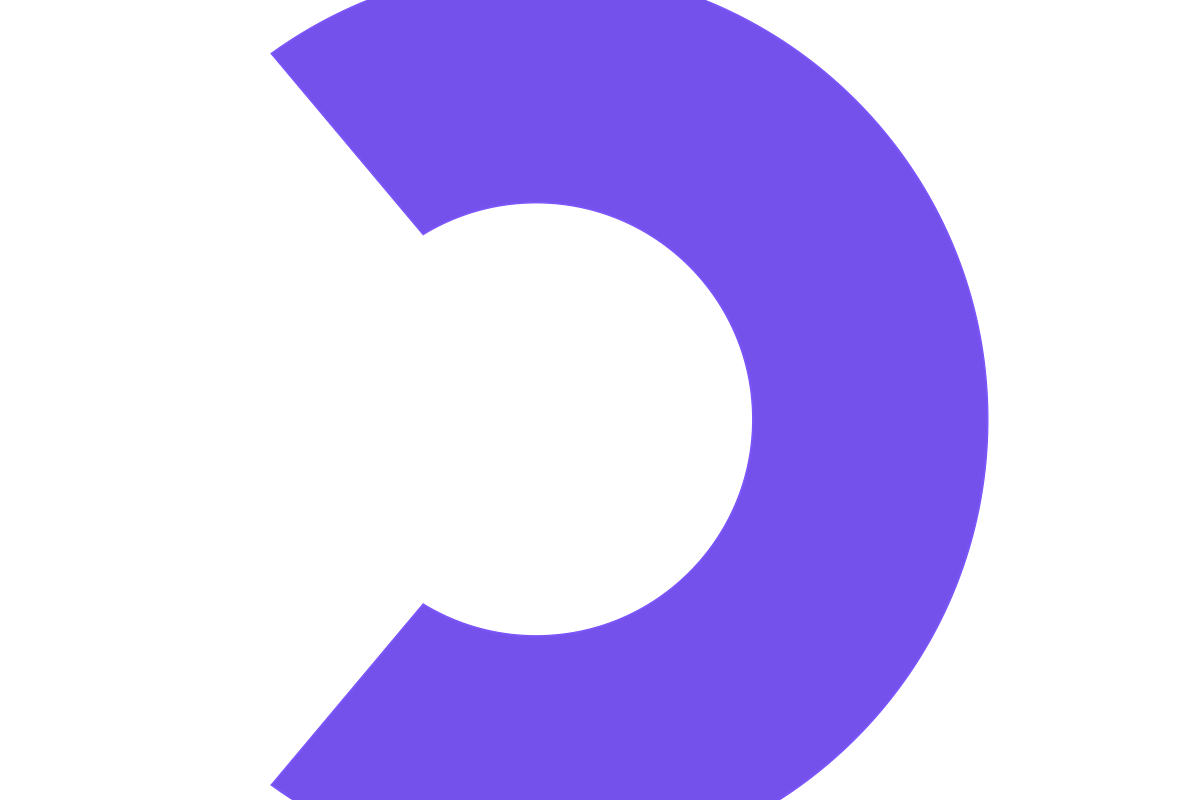

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from utils import *

# File system manangement
import os
import gc
import time

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import decomposition
from functions import *
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift

# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

# Load the clients dataset

In [2]:
is_poly = False # try on data with polynomial variables
is_only_num = False # try on data with numerical variables
is_pca = True # do we apply pca?

In [3]:
#if is_poly:
    #df_clients = pd.read_csv('data/df_clients_poly.csv')
#else:
df_clients = pd.read_csv('data/df_clients.csv')

In [4]:
df_clients.head()

customer_unique_id  product_id_COUNT  order_id_COUNT  \
0  0000366f3b9a7992bf8c76cfdf3221e2                 1               1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                 1               1   
2  0000f46a3911fa3c0805444483337064                 1               1   
3  0000f6ccb0745a6a4b88665a16c9f078                 1               1   
4  0004aac84e0df4da2b147fca70cf8255                 1               1   

  payment_type_LAMBDA  payment_value_SUM  payment_sequential_MAX  \
0         credit_card             141.90                       1   
1         credit_card              27.19                       1   
2         credit_card              86.22                       1   
3         credit_card              43.62                       1   
4         credit_card             196.89                       1   

   payment_installments_MAX  review_score_MAX  price_MEAN  freight_value_SUM  \
0                         8                 5      129.90              12.00   
1                         1                 4       18.90               8.29   
2                         8                 3       69.00              17.22   
3                         4                 4       25.99              17.63   
4                         6                 5      180.00              16.89   

   ...  diff_del_car_MEAN3  diff_del_car_MEAN2diff_est_act_MEAN  \
0  ...                64.0                                 80.0   
1  ...                 1.0                                  5.0   
2  ...             12167.0                               1058.0   
3  ...              6859.0                               4332.0   
4  ...              1331.0                                968.0   

   diff_del_car_MEAN2diff_cust_pur_MEAN  diff_del_car_MEANdiff_est_act_MEAN2  \
0                                1792.0                                100.0   
1                                 115.0                                 25.0   
2                              284602.0                                 92.0   
3                              116242.0                               2736.0   
4                               34969.0                                704.0   

  diff_del_car_MEANdiff_est_act_MEANdiff_cust_pur_MEAN  \
0                                             2240.0     
1                                              575.0     
2                                            24748.0     
3                                            73416.0     
4                                            25432.0     

  diff_del_car_MEANdiff_cust_pur_MEAN2 diff_est_act_MEAN3  \
0                              50176.0              125.0   
1                              13225.0              125.0   
2                            6657212.0                8.0   
3                            1969996.0             1728.0   
4                             918731.0              512.0   

  diff_est_act_MEAN2diff_cust_pur_MEAN  diff_est_act_MEANdiff_cust_pur_MEAN2  \
0                               2800.0                               62720.0   
1                               2875.0                               66125.0   
2                               2152.0                              578888.0   
3                              46368.0                             1244208.0   
4                              18496.0                              668168.0   

   diff_cust_pur_MEAN3  
0            1404928.0  
1            1520875.0  
2          155720872.0  
3           33386248.0  
4           24137569.0  

[5 rows x 143 columns]

In [5]:
df_clients.shape

(90563, 143)

In [6]:
df_clients.describe(include=[object])

customer_unique_id payment_type_LAMBDA  \
count                              90563               90563   
unique                             90563                   4   
top     0000366f3b9a7992bf8c76cfdf3221e2         credit_card   
freq                                   1               68773   

       product_category_name_en_LAMBDA my_categoty_LAMBDA  \
count                            90563              90563   
unique                              73                 19   
top                     bed_bath_table           dressing   
freq                              8758              13069   

       customer_state_top10_LAMBDA seller_state_top10_LAMBDA  
count                        90563                     90563  
unique                          11                        11  
top                             SP                        SP  
freq                         38092                     63734

In [7]:
df_clients.describe()

product_id_COUNT  order_id_COUNT  payment_value_SUM  \
count      90563.000000    90563.000000       90563.000000   
mean           1.078376        1.078376         173.592049   
std            0.363645        0.363645         265.651236   
min            1.000000        1.000000           0.010000   
25%            1.000000        1.000000          61.690000   
50%            1.000000        1.000000         106.970000   
75%            1.000000        1.000000         186.565000   
max           14.000000       14.000000       15978.650000   

       payment_sequential_MAX  payment_installments_MAX  review_score_MAX  \
count            90563.000000              90563.000000      90563.000000   
mean                 1.022702                  2.928238          4.165034   
std                  0.235845                  2.719429          1.277844   
min                  1.000000                  1.000000          1.000000   
25%                  1.000000                  1.000000          4.000000   
50%                  1.000000                  2.000000          5.000000   
75%                  1.000000                  4.000000          5.000000   
max                 19.000000                 24.000000          5.000000   

         price_MEAN  freight_value_SUM  product_weight_g_MEAN  \
count  90563.000000       90563.000000           90563.000000   
mean     125.879131          21.659392            2110.137608   
std      189.125956          18.094929            3737.171043   
min        0.850000           0.000000               0.000000   
25%       42.912500          13.610000             300.000000   
50%       79.000000          16.860000             700.000000   
75%      139.900000          23.090000            1825.000000   
max     6735.000000        1002.290000           40425.000000   

       product_length_cm_MEAN  ...  diff_del_car_MEAN3  \
count            90563.000000  ...        9.056300e+04   
mean                30.134459  ...        5.856315e+03   
std                 15.994605  ...        9.930218e+04   
min                  7.000000  ...        0.000000e+00   
25%                 18.000000  ...        6.400000e+01   
50%                 25.000000  ...        3.430000e+02   
75%                 38.000000  ...        1.728000e+03   
max                105.000000  ...        8.615125e+06   

       diff_del_car_MEAN2diff_est_act_MEAN  \
count                         9.056300e+04   
mean                         -1.808593e+03   
std                           8.406818e+04   
min                          -7.900700e+06   
25%                           9.900000e+01   
50%                           5.070000e+02   
75%                           1.216000e+03   
max                           8.394200e+04   

       diff_del_car_MEAN2diff_cust_pur_MEAN  \
count                          9.056300e+04   
mean                           4.218547e+04   
std                            2.766351e+05   
min                            0.000000e+00   
25%                            1.936000e+03   
50%                            1.110000e+04   
75%                            3.557100e+04   
max                            2.032344e+07   

       diff_del_car_MEANdiff_est_act_MEAN2  \
count                         9.056300e+04   
mean                          3.653983e+03   
std                           7.233628e+04   
min                           0.000000e+00   
25%                           3.240000e+02   
50%                           1.024000e+03   
75%                           2.205000e+03   
max                           7.245520e+06   

       diff_del_car_MEANdiff_est_act_MEANdiff_cust_pur_MEAN  \
count                                       9.056300e+04      
mean                                        1.457725e+04      
std                                         2.267053e+05      
min                                        -1.739016e+07      
25%                                         3.360000e+03      
50%          

## Deleting the customer id column

In [8]:
df_clients = df_clients.drop(["customer_unique_id"], axis=1)

# Feature selection

Know we will we will make some feature selection for our problem. In the case of polynomial features we see the correlation between the created variables and try to simplify the dataset by removing the features with high corelation between each other. Otherwise we try to select some important features for our segmentation ourseself.

In [9]:
df_clients.shape
if is_poly:
    df_clients_corr = df_clients.corr()
    df_clients = remove_columns_regarding_correlation(df_clients, df_clients_corr, hdc_make=False, hc_make=True)
else:
    columns_of_interest = ['product_id_COUNT',
                        #'payment_type_LAMBDA',
                        'payment_value_SUM',
                        #'payment_sequential_MAX',
                        #'payment_installments_MAX',
                        'review_score_MAX',
                        'price_MEAN',
                        #'freight_value_SUM',
                        #'product_weight_g_MEAN',
                        #'product_length_cm_MEAN',
                        #'product_height_cm_MEAN',
                        #'product_width_cm_MEAN',
                        #'product_category_name_en_LAMBDA',
                        'my_categoty_LAMBDA',
                        #'customer_state_top10_LAMBDA',
                        #'seller_state_top10_LAMBDA',
                        'geolocation_lat_MEAN',
                        'geolocation_lng_MEAN',
                        #'diff_car_app_MEAN',
                        #'diff_del_car_MEAN',
                        #'diff_est_act_MEAN',
                        'diff_cust_pur_MEAN']
    df_clients = df_clients[columns_of_interest]

if is_only_num:
    num_cols = df_clients._get_numeric_data().columns
    df_clients = df_clients[num_cols]
    
df_clients.shape

(90563, 142)

(90563, 8)

<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

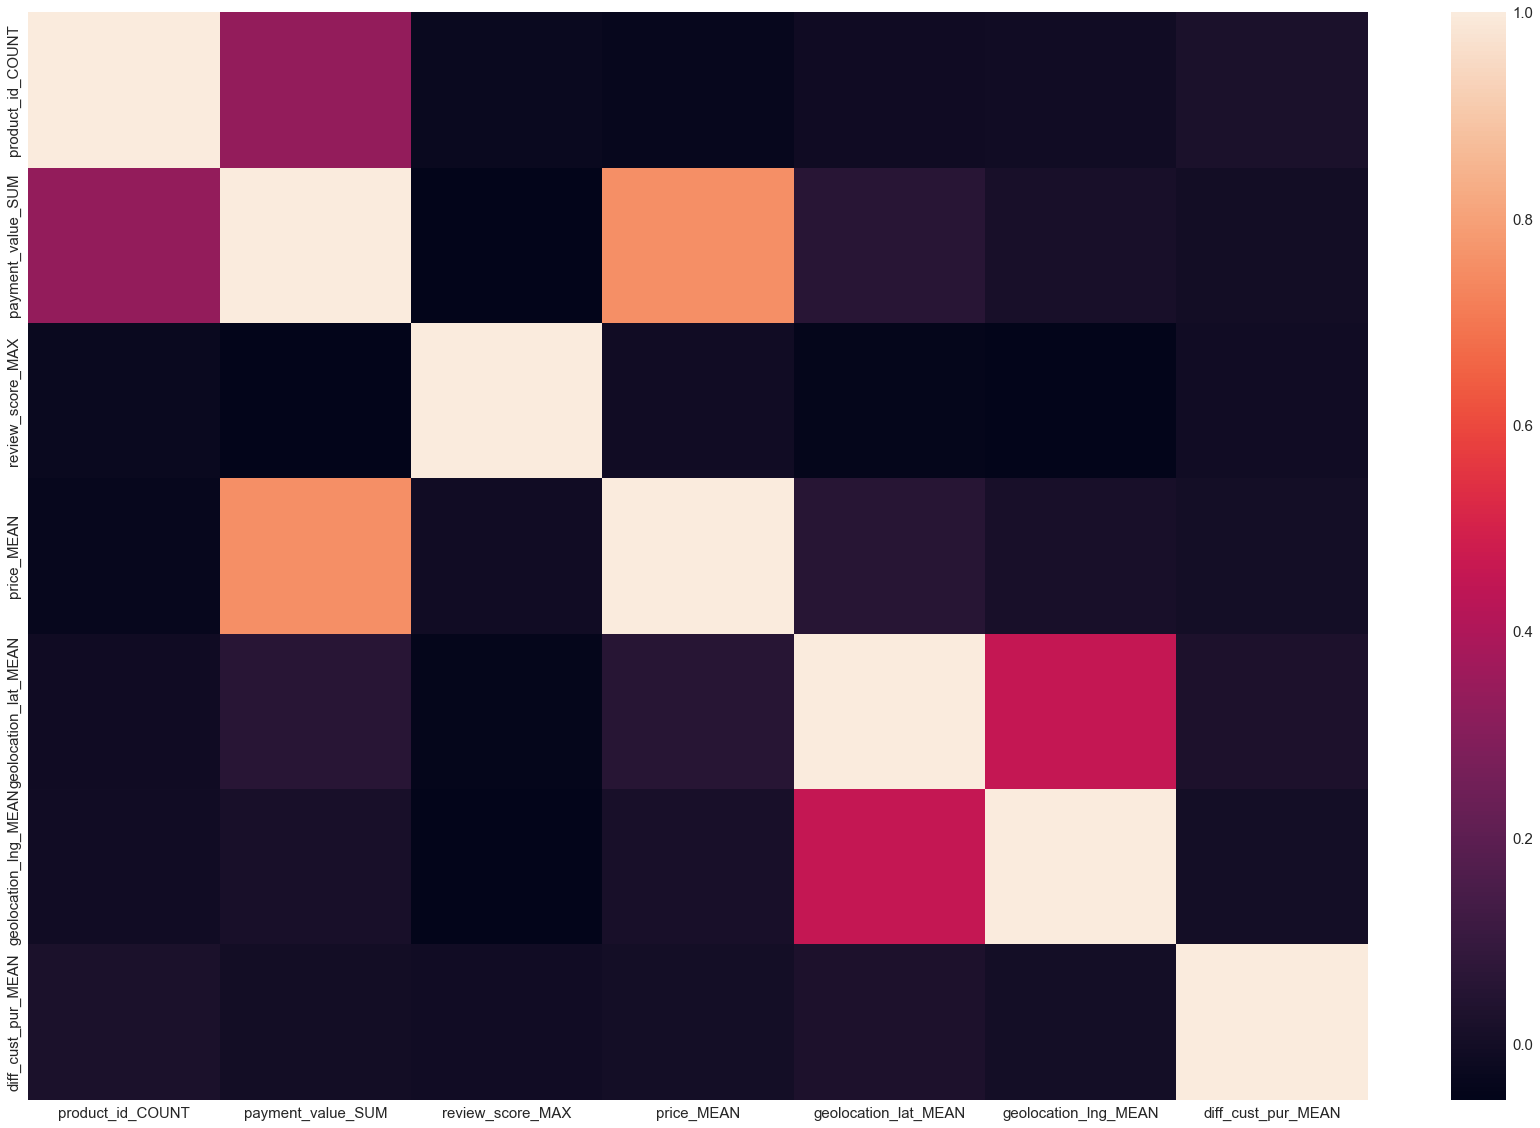

In [10]:
df_clients_corr = df_clients.corr()
plt.figure(figsize=(30,20))
sns.heatmap(df_clients_corr)

## Encoding categorical variables

In [11]:
df_clients.shape
if is_only_num==False:
    df_clients, new_columns = encode_categorical_variables(df_clients, nan_as_category = True)
    df_clients_encoded_corr = df_clients.corr()
    df_clients = remove_columns_regarding_correlation(df_clients, df_clients_encoded_corr, hdc_make=False, hc_make=True)
    
df_clients.shape

(90563, 8)

(90563, 27)

In [12]:
df_clients.head()

product_id_COUNT  payment_value_SUM  review_score_MAX  price_MEAN  \
0                 1             141.90                 5      129.90   
1                 1              27.19                 4       18.90   
2                 1              86.22                 3       69.00   
3                 1              43.62                 4       25.99   
4                 1             196.89                 5      180.00   

   geolocation_lat_MEAN  geolocation_lng_MEAN  diff_cust_pur_MEAN  \
0            -23.335331            -46.828647               112.0   
1            -23.567395            -46.792957               115.0   
2            -27.543787            -48.625680               538.0   
3             -1.311011            -48.482884               322.0   
4            -23.504368            -47.466156               289.0   

   my_categoty_LAMBDA_accessories  my_categoty_LAMBDA_animals  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   my_categoty_LAMBDA_art  ...  my_categoty_LAMBDA_flowers  \
0                       0  ...                           0   
1                       0  ...                           0   
2                       0  ...                           0   
3                       0  ...                           0   
4                       0  ...                           0   

   my_categoty_LAMBDA_furniture  my_categoty_LAMBDA_hobies_learn  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   my_categoty_LAMBDA_home_layout  my_categoty_LAMBDA_kitchen_electronics  \
0                               1                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

   my_categoty_LAMBDA_personal_care  my_categoty_LAMBDA_security  \
0                                 0                            0   
1                                 1                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   my_categoty_LAMBDA_telephony  my_categoty_LAMBDA_tools  \
0                             0                         0   
1                             0                         0   
2                             1                         0   
3                             1                         0   
4                             1                         0   

   my_categoty_LAMBDA_nan  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 27 columns]

## Normalization dataset

In [13]:
std_scale = preprocessing.RobustScaler().fit(df_clients) #preprocessing.MinMaxScaler, StandardScaler RobustScaler
df_clients = pd.DataFrame(std_scale.transform(df_clients), columns=df_clients.columns)

In [14]:
df_clients.head()

product_id_COUNT  payment_value_SUM  review_score_MAX  price_MEAN  \
0               0.0           0.279720               0.0    0.524810   
1               0.0          -0.638879              -1.0   -0.619667   
2               0.0          -0.166166              -2.0   -0.103106   
3               0.0          -0.507307              -1.0   -0.546565   
4               0.0           0.720080               0.0    1.041371   

   geolocation_lat_MEAN  geolocation_lng_MEAN  diff_cust_pur_MEAN  \
0             -0.118548             -0.043644           -0.469828   
1             -0.185712             -0.035704           -0.456897   
2             -1.336574             -0.443424            1.366379   
3              6.255811             -0.411656            0.435345   
4             -0.167471             -0.185468            0.293103   

   my_categoty_LAMBDA_accessories  my_categoty_LAMBDA_animals  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   

   my_categoty_LAMBDA_art  ...  my_categoty_LAMBDA_flowers  \
0                     0.0  ...                         0.0   
1                     0.0  ...                         0.0   
2                     0.0  ...                         0.0   
3                     0.0  ...                         0.0   
4                     0.0  ...                         0.0   

   my_categoty_LAMBDA_furniture  my_categoty_LAMBDA_hobies_learn  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   
3                           0.0                              0.0   
4                           0.0                              0.0   

   my_categoty_LAMBDA_home_layout  my_categoty_LAMBDA_kitchen_electronics  \
0                             1.0                                     0.0   
1                             0.0                                     0.0   
2                             0.0                                     0.0   
3                             0.0                                     0.0   
4                             0.0                                     0.0   

   my_categoty_LAMBDA_personal_care  my_categoty_LAMBDA_security  \
0                               0.0                          0.0   
1                               1.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   

   my_categoty_LAMBDA_telephony  my_categoty_LAMBDA_tools  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           1.0                       0.0   

   my_categoty_LAMBDA_nan  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  

[5 rows x 27 columns]

# Dimension reduction

In [15]:
pca_features_ratio = {}
explained_by_pca = 0.95
is_not_selected=True
if is_pca:
    pca = PCA(random_state=10)
    pca.fit(df_clients)
    for k in range(df_clients.shape[1]):
        s = np.cumsum(pca.explained_variance_ratio_)[k]
        pca_features_ratio[k] = s
        if ((s>=explained_by_pca) & is_not_selected):
            n_comp = k
            is_not_selected = False

PCA(random_state=10)

In [16]:
if is_pca:
    n_comp

7

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Cumulative variance sum of PCA')

Text(0.5, 0, 'Number of PCA components')

Text(0, 0.5, 'Cumulative variance')

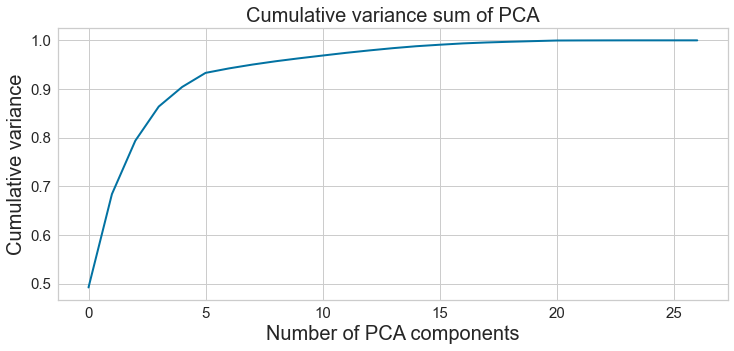

In [17]:
if is_pca:
    plt.figure(figsize=(12,5));
    plt.title('Cumulative variance sum of PCA');
    plt.xlabel('Number of PCA components');
    plt.ylabel('Cumulative variance');
    plt.plot(list(range(df_clients.shape[1])),
        np.cumsum(pca.explained_variance_ratio_), '-x');

In [18]:
if is_pca:
    np.cumsum(pca.explained_variance_ratio_)[n_comp] #11

0.9502308568082326

In [19]:
# Calcul des composantes principales
if is_pca:
    colonnes_pca = df_clients.columns
    
    pca = decomposition.PCA(n_components=n_comp, random_state=10)
    pca.fit(df_clients)

    X_projected = pca.fit_transform(df_clients)


    X_projected = pd.DataFrame(X_projected, index = df_clients.index, columns = ['F{0}'.format(i) for i in range(n_comp)])

    X_projected

PCA(n_components=7, random_state=10)

F0        F1        F2         F3        F4        F5        F6
0      -0.222876 -0.699643 -0.787565  -0.078915 -0.108137 -0.535494 -0.226875
1      -1.646087 -0.575821  0.243488  -0.007838 -0.089729 -0.548560 -0.387929
2      -1.009587 -1.736203  1.314623  -0.230213  0.048896  1.301410 -0.105670
3      -1.121348  5.394564 -0.284708   0.119789  2.298977  0.209992 -0.069174
4       0.439073 -0.811170 -0.817970  -0.186122  0.057630  0.221523 -0.091333
...          ...       ...       ...        ...       ...       ...       ...
90558  28.406106  2.434931  0.672201  15.733920 -1.292395  0.907695 -0.266025
90559  -0.769958  3.026670 -0.042860  -0.034693 -0.707381  0.109501 -0.068632
90560  -0.490930  1.907760 -1.047703   0.116371  2.844900  1.270624 -0.072973
90561  -0.312909  0.284401 -0.844032  -0.044034 -0.991525 -0.493665 -0.105342
90562  -1.182659 -1.370200 -0.712190   0.073815  0.332655  1.037773 -0.406485

[90563 rows x 7 columns]

In [20]:
#features = df.columns
# Cercle des corrélations
#pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

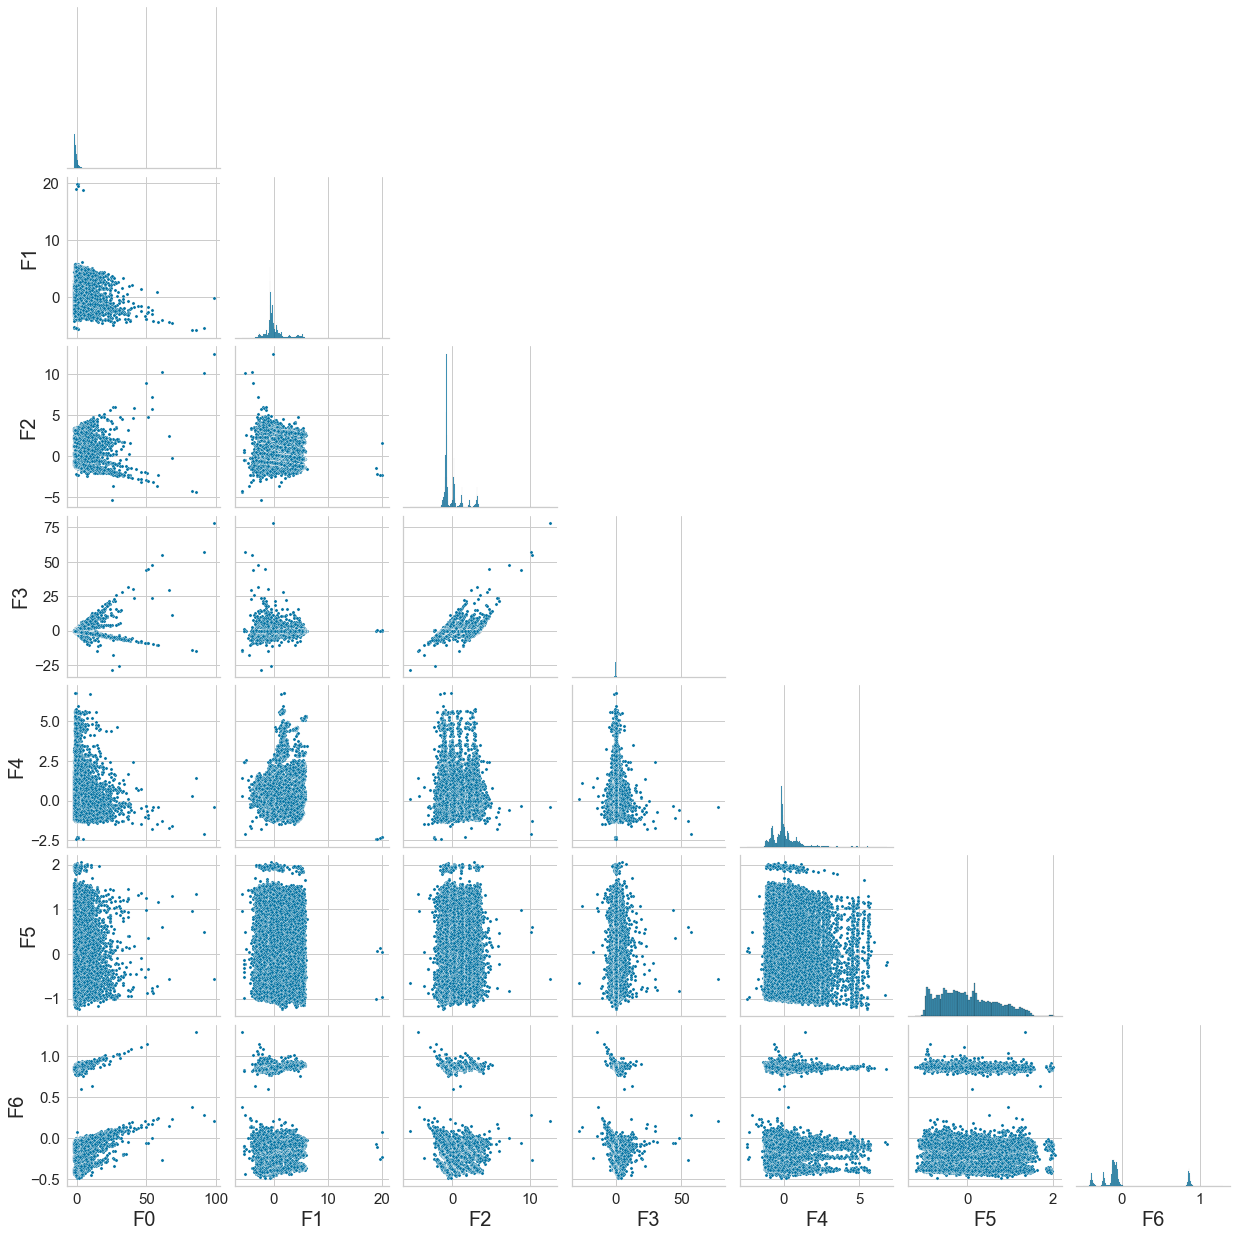

In [21]:
if is_pca:
    N = 7
    sns.pairplot(X_projected.iloc[: , :N], plot_kws = {'s': 10}, corner=True)

In [22]:
if is_pca:
    df_clients = X_projected

# Visualization by TSNE

In [23]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(df_clients)
T = pd.DataFrame(T, columns=['T1', 'T2'])

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


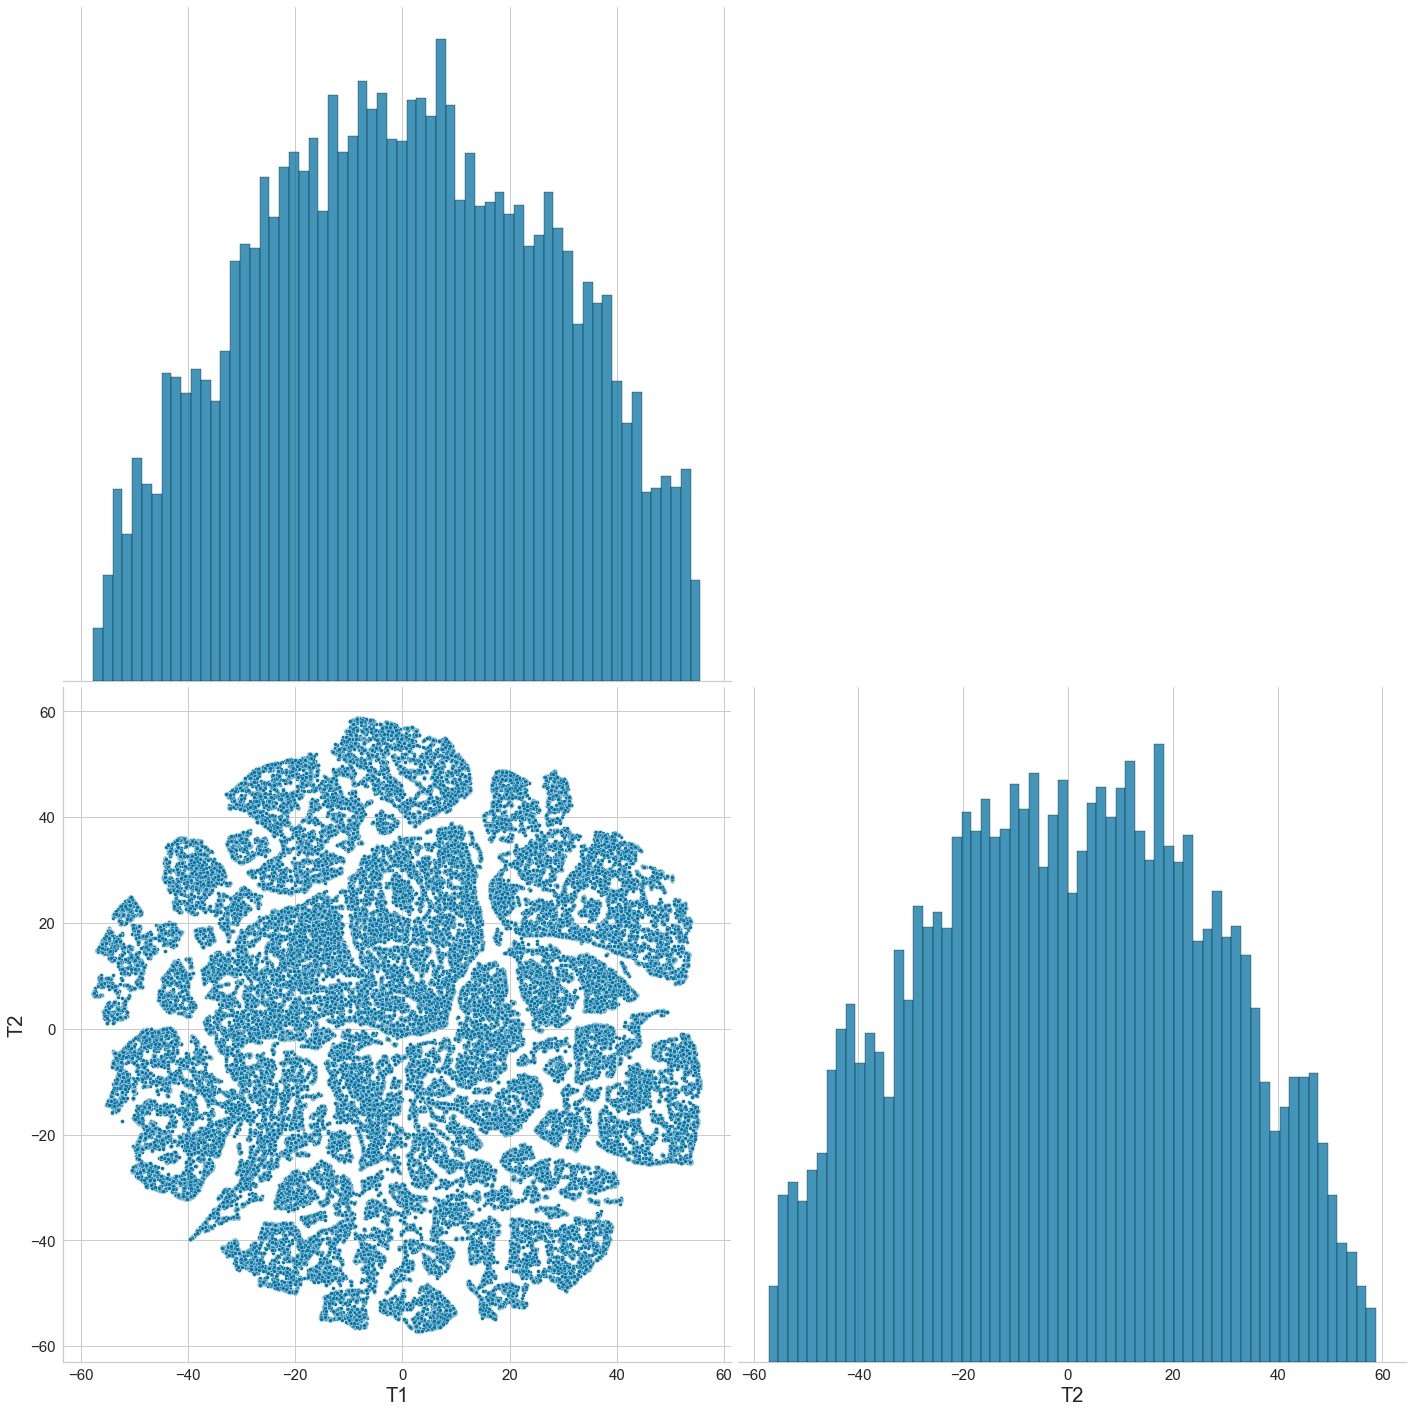

In [24]:
sns.pairplot(T, plot_kws = {'s': 15}, size=10, corner=True)

# Selecting the optimal number of clusters

In [25]:
# BIC for GMM
#from sklearn.mixture import GaussianMixture
#n_components = range(2, 15);
#covariance_type = ['full', 'spherical', 'tied', 'diag']
#score=[];
#
#for cov in covariance_type:
#    for n_comp in n_components:
#        with timer('passing... {0} covariance with {1} clusters '.format(cov, n_comp)):
#            gmm=GaussianMixture(n_components=n_comp, covariance_type=cov, init_params='kmeans', max_iter=1000, n_init=10);
#            gmm.fit(df_clients);
#            score.append((cov,n_comp,gmm.bic(df_clients),gmm.aic(df_clients)));
#
#score = pd.DataFrame(score, columns = ['cov_type', 'k', 'bic', 'aic']);

In [26]:
#sns.lineplot(x="k", y="bic",
#            hue="cov_type",
#            data=score);

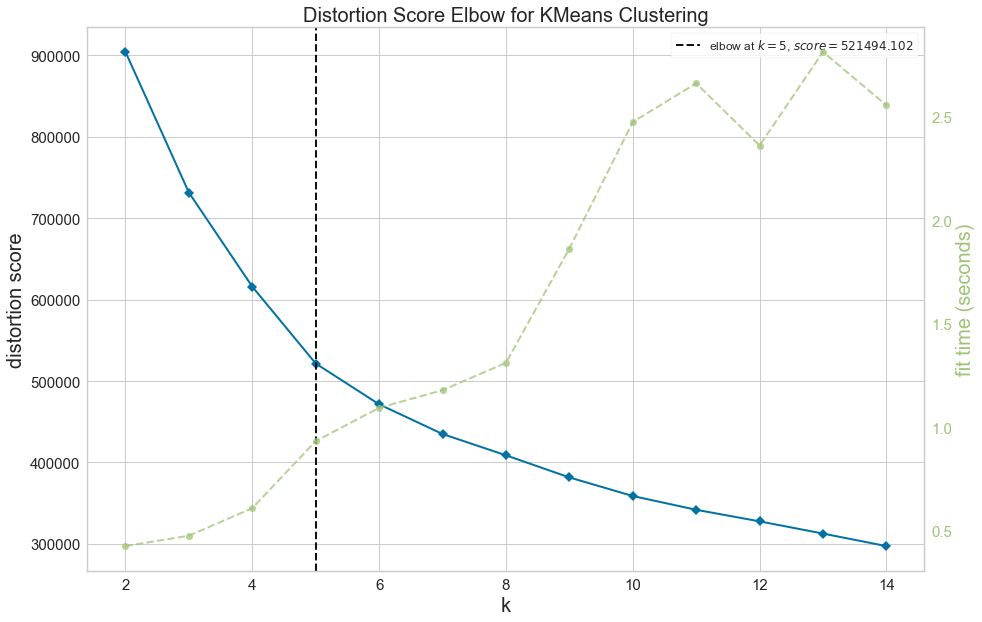

In [27]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = KElbowVisualizer(model, k=(2,15))

vis = visualizer.fit(df_clients);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

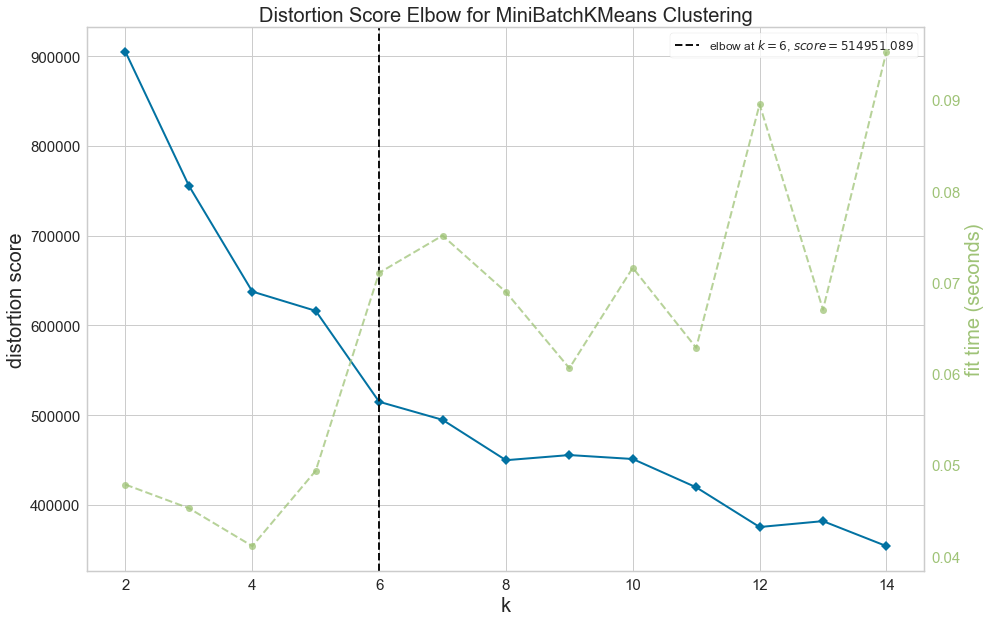

In [28]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = KElbowVisualizer(model, k=(2,15))

vis = visualizer.fit(df_clients);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

Due to theese analysis a choise of 7 clusters is made. Next We can see a silhuete vizualizer. Note that 6 and 5 clusters are also interesting to analyse. We will see next what choise we make.

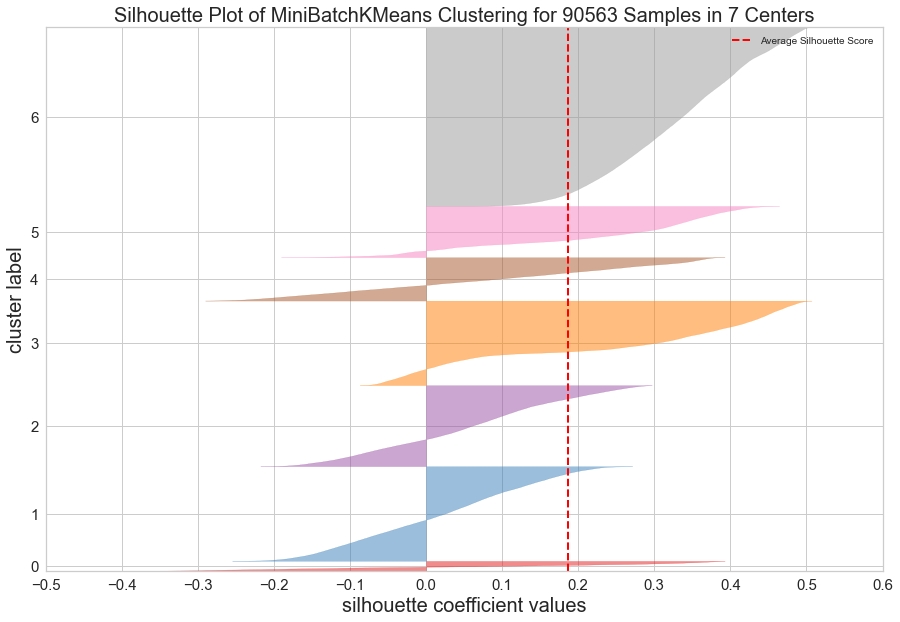

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 90563 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# Instantiate the clustering model and visualizer 
model = MiniBatchKMeans(n_clusters=7, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(df_clients)
visualizer.poof()    # Draw/show/poof the data

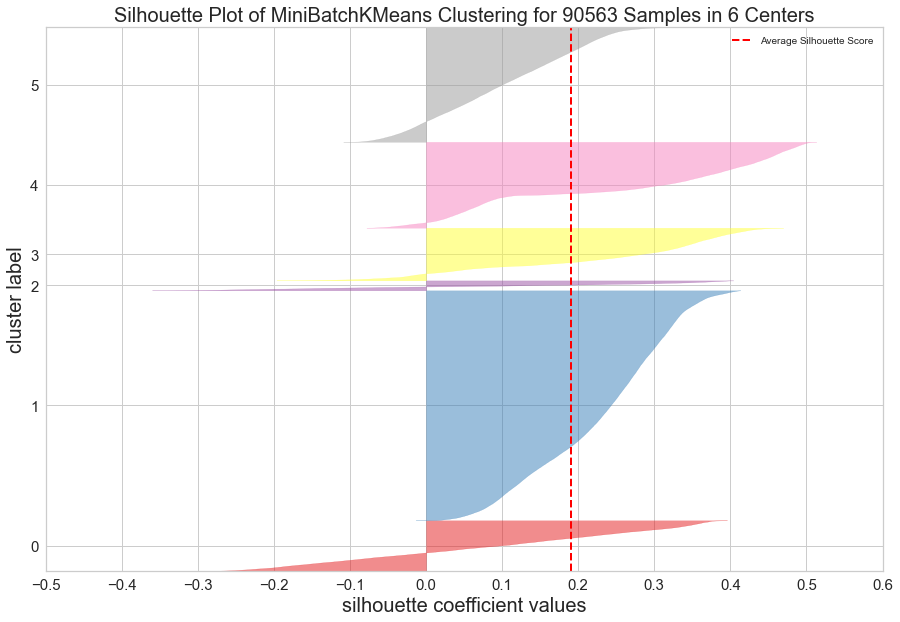

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 90563 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
model = MiniBatchKMeans(n_clusters=6, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(df_clients)
visualizer.poof()    # Draw/show/poof the data

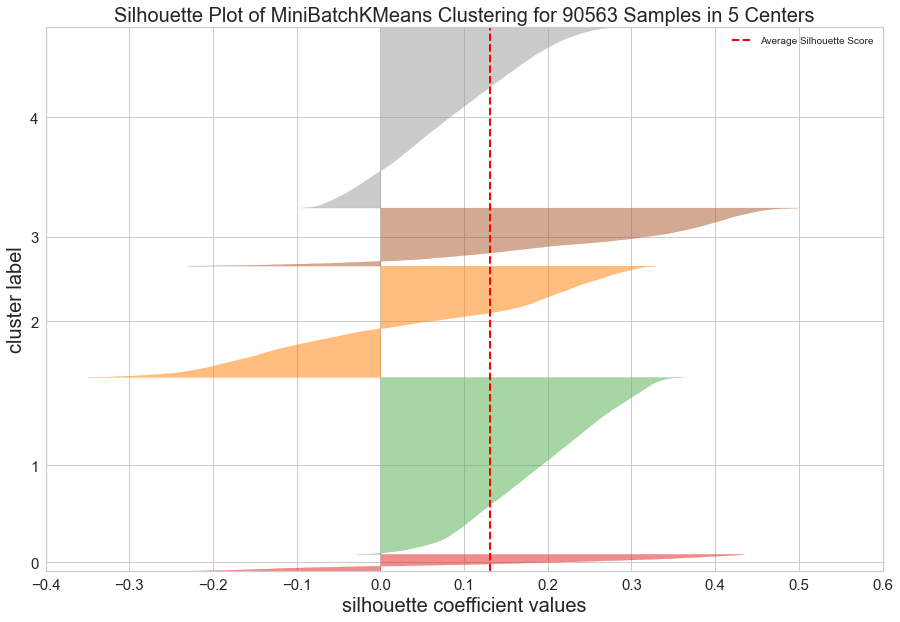

<AxesSubplot:title={'center':'Silhouette Plot of MiniBatchKMeans Clustering for 90563 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# Instantiate the clustering model and visualizer 
model = MiniBatchKMeans(n_clusters=5, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(df_clients)
visualizer.poof()    # Draw/show/poof the data

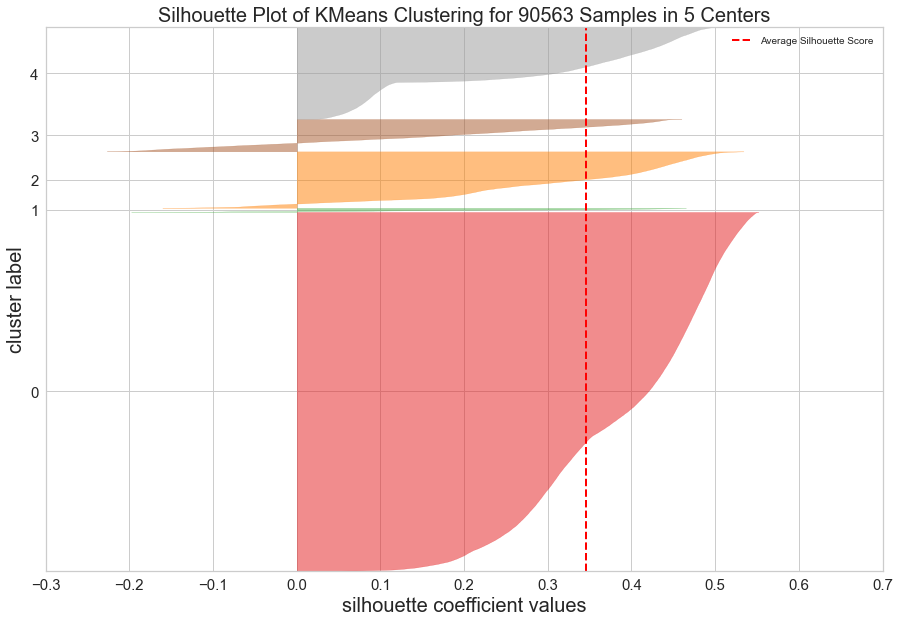

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 90563 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
model = KMeans(n_clusters=5, random_state=10, init='k-means++', n_init=10, max_iter=1500)
visualizer = SilhouetteVisualizer(model)
vis = visualizer.fit(df_clients)
visualizer.poof()    # Draw/show/poof the data

Regarding the result for silhuette score, KMeans seems to be a better choise than MiniBatchKMeans for this data. Let us see know what is the value of the optimal number of clusters by computating of silhuette score.

Also let us see the davies_bouldin score.

In [104]:
from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import silhouette_score
#inertia = {}
#dict_kmeans = {}
#silhouettes_kmeans = {}
davies_bouldin_kmeans = {}
for k in range(2,20):
    print('Kmeans for {0} clusters'.format(k))
    kmeans = KMeans(n_clusters=k, random_state=10, init='k-means++', n_init=10, max_iter=1500).fit(df_clients)
#    inertia[k] = kmeans.inertia_
#    dict_kmeans[k] = kmeans
#    silhouettes_kmeans[k] = silhouette_score(X = X_projected, labels= kmeans.labels_)
    davies_bouldin_kmeans[k] = davies_bouldin_score(X = df_clients, labels= kmeans.labels_)

Kmeans for 2 clusters
Kmeans for 3 clusters
Kmeans for 4 clusters
Kmeans for 5 clusters
Kmeans for 6 clusters
Kmeans for 7 clusters
Kmeans for 8 clusters
Kmeans for 9 clusters
Kmeans for 10 clusters
Kmeans for 11 clusters
Kmeans for 12 clusters
Kmeans for 13 clusters
Kmeans for 14 clusters
Kmeans for 15 clusters
Kmeans for 16 clusters
Kmeans for 17 clusters
Kmeans for 18 clusters
Kmeans for 19 clusters


In [107]:
#print('maximum value for silhuette score is for {0} clusters'.format(max(silhouettes_kmeans, key=silhouettes_kmeans.get)))
print('the Davies Bouldin score is minimal for {0} clusters'.format(min(davies_bouldin_kmeans, key=davies_bouldin_kmeans.get)))

the Davies Bouldin score is minimal for 2 clusters


In [31]:
#import scipy.cluster.hierarchy as shc
#from matplotlib import pyplot
#pyplot.figure(figsize=(15,10))  
#pyplot.title("Dendrograms")  
#dend = shc.dendrogram(shc.linkage(X_projected, method='ward'))

In the figure of Elbow score we can see that the curbe is slightly descending and a number of clusters can not be strongly selected. An optimal number of clusters is proposed by KElbowVisualizer to be equal to 6 is selected for the MiniBatchKMeans and an optimal number of clusters for KMeans is selected to be equal to 5. Regarding the silhuette value we choose that KMeans with 5 number of clusters is however an optimal choise. Let us see the results on the data.df_clients

# Applying unsupervised learning methods on our dataset.

## K-Means

In [73]:
kmeans = KMeans(n_clusters=5, random_state=10, init='k-means++', n_init=10, max_iter=1500).fit(df_clients)
df_clients['k_means_labels'] = kmeans.labels_
T['k_means_labels'] = kmeans.labels_

<AxesSubplot:xlabel='F0', ylabel='F1'>

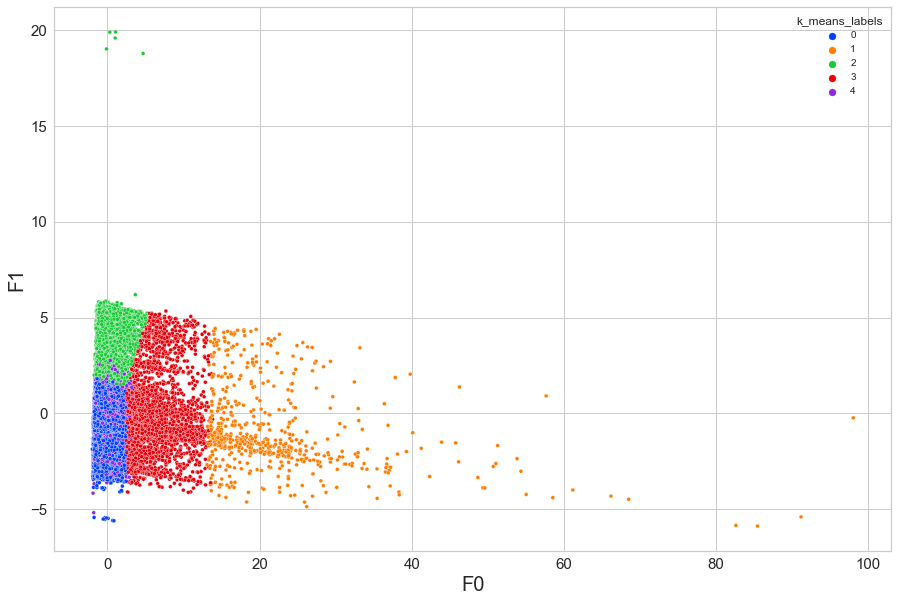

In [74]:
if is_pca:
    palette = sns.color_palette("bright", len(df_clients['k_means_labels'].unique()))  #Choosing color
    sns.scatterplot(data = df_clients, x = 'F0', y = 'F1', 
                    hue = 'k_means_labels',
                    s=15, legend='full', palette=palette)
    df_clients.drop(columns=['k_means_labels'], inplace=True);

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='T1', ylabel='T2'>

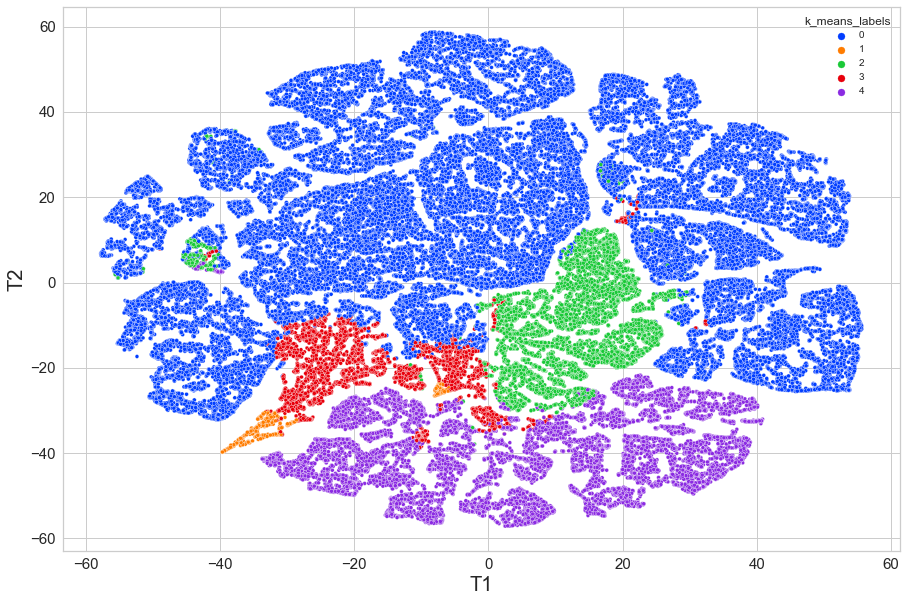

In [75]:
palette = sns.color_palette("bright", len(T.k_means_labels.unique()))  #Choosing color
sns.scatterplot(T.T1, T.T2, hue=T.k_means_labels, legend='full', palette=palette, s=15)

## MiniBatchKMeans

In [76]:
mkmeans = MiniBatchKMeans(n_clusters=6, random_state=10, init='k-means++', n_init=10, max_iter=1500).fit(df_clients)
df_clients['mk_means_labels'] = mkmeans.labels_
T['mk_means_labels'] = mkmeans.labels_

<AxesSubplot:xlabel='F0', ylabel='F1'>

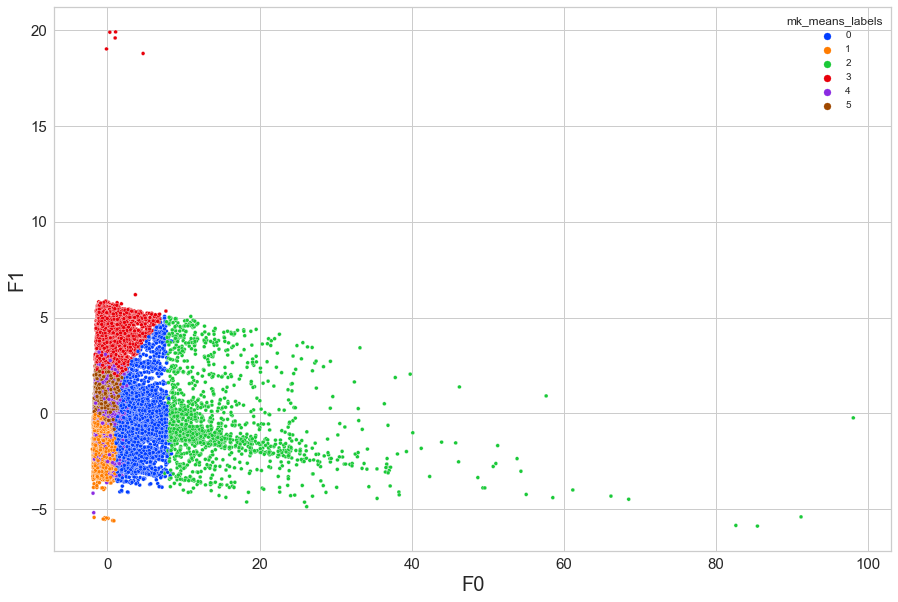

In [77]:
if is_pca:
    palette = sns.color_palette("bright", len(df_clients['mk_means_labels'].unique()))  #Choosing color
    sns.scatterplot(data = df_clients, x = 'F0', y = 'F1', 
                    hue = 'mk_means_labels',
                    s=15, legend='full', palette=palette)
    df_clients.drop(columns=['mk_means_labels'], inplace=True);

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='T1', ylabel='T2'>

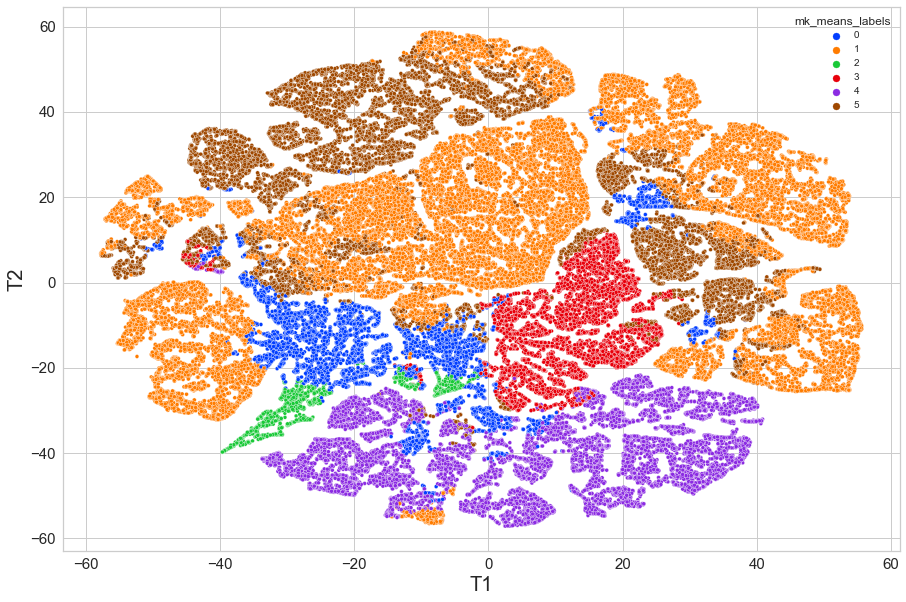

In [78]:
palette = sns.color_palette("bright", len(T.mk_means_labels.unique()))  #Choosing color
sns.scatterplot(T.T1, T.T2, hue=T.mk_means_labels, legend='full', palette=palette, s=15)

## DBSCAN

Another unsupervised algorithm to see is the DBSCAN. This does not seem an optimal choise for our data.

In [79]:
dbs = DBSCAN(eps = 1, min_samples=20).fit(X_projected)
T['dbs_labels'] = dbs.labels_

In [80]:
len(np.unique(dbs.labels_))

4

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='T1', ylabel='T2'>

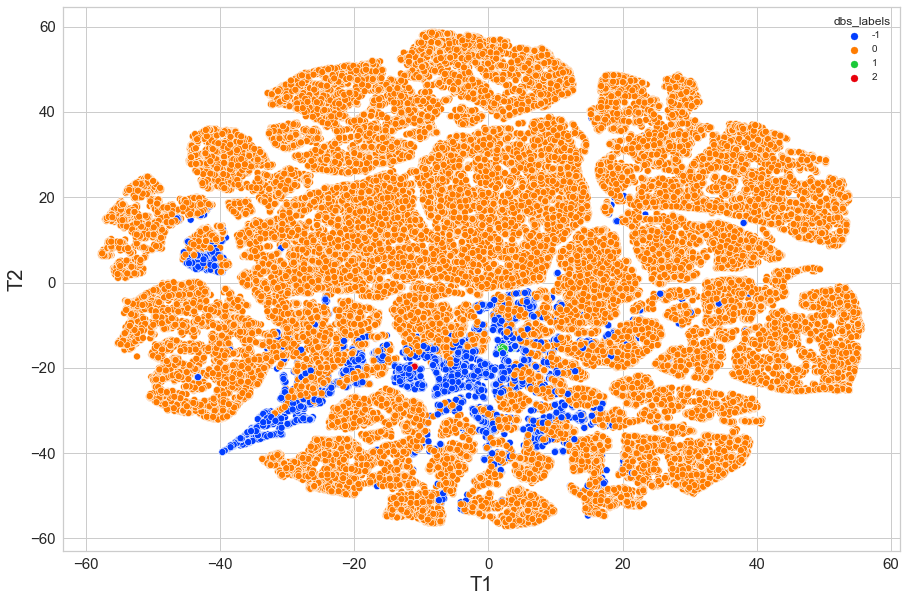

In [81]:
palette = sns.color_palette("bright", len(T.dbs_labels.unique()))  #Choosing color
sns.scatterplot(T.T1, T.T2, hue=T.dbs_labels, legend='full', palette=palette)

## Agglomerative Clustering

In [208]:
#from sklearn.cluster import AgglomerativeClustering
#cah = AgglomerativeClustering(n_clusters = 6).fit(X_projected)
#T['cah_labels'] = cah.labels_
#sns.scatterplot(data=T, x="T1", y="T2", hue="cah_labels")

# Cluster analysis

In [209]:
#df_clients_original = pd.read_csv('data/df_clients.csv')

In [82]:
df_clients_original = pd.read_csv('data/df_clients.csv')

In [83]:
columns_of_interest = ['customer_unique_id',
    'product_id_COUNT',
                        'payment_type_LAMBDA',
                        #'payment_value_SUM',
                        #'payment_sequential_MAX',
                        #'payment_installments_MAX',
                        'review_score_MAX',
                        'price_MEAN',
                        #'freight_value_SUM',
                        #'product_weight_g_MEAN',
                        #'product_length_cm_MEAN',
                        #'product_height_cm_MEAN',
                        #'product_width_cm_MEAN',
                        #'product_category_name_en_LAMBDA',
                        'my_categoty_LAMBDA',
                        'customer_state_top10_LAMBDA',
                        'seller_state_top10_LAMBDA',
                        'geolocation_lat_MEAN',
                        'geolocation_lng_MEAN',
                        'diff_car_app_MEAN',
                        'diff_del_car_MEAN',
                        'diff_est_act_MEAN',
                        'diff_cust_pur_MEAN']
df_clients_original = df_clients_original[columns_of_interest]

In [84]:
df_clients_original.loc[:, 'clusters']  = kmeans.labels_

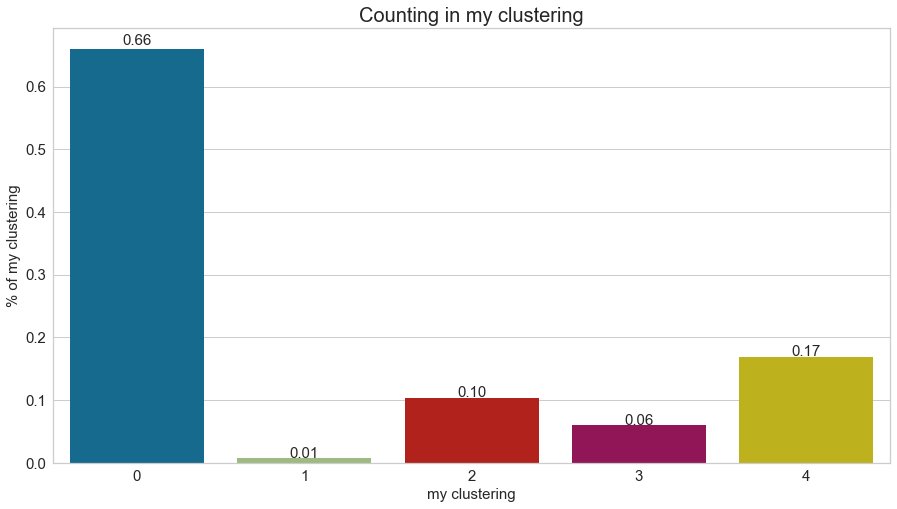

In [85]:
plot_count_col(df_clients_original, col= 'clusters', label_col='my clustering', show_val=True, on_x=True)

We observe that the biggest cluster is the cluster `0` that consists of 66% of the data. And the smallsest clusters is the `1`-st cluster. The `2`-nd and `3`-th cluster and `4`-th cluster consisting just 10%, 6% and 17% of data. 
We will try to analyse theese clusters one by one giving some informations about them.

In [86]:
df_clients_original.groupby('clusters').agg('mean')

product_id_COUNT  review_score_MAX   price_MEAN  \
clusters                                                    
0                 1.060670          4.755881    89.329298   
1                 1.256677          4.005935  1543.901121   
2                 1.054232          4.052850   109.885971   
3                 1.294598          4.124373   484.295071   
4                 1.078453          1.942943    89.897610   

          geolocation_lat_MEAN  geolocation_lng_MEAN  diff_car_app_MEAN  \
clusters                                                                  
0                   -22.895338            -46.890343           2.431560   
1                   -19.782144            -46.266992           3.848972   
2                    -8.057075            -41.006698           2.703980   
3                   -20.979021            -46.323776           3.360992   
4                   -22.749831            -46.584554           3.559571   

          diff_del_car_MEAN  diff_est_act_MEAN  diff_cust_pur_MEAN  
clusters                                                            
0                  7.256156          12.865397          237.059936  
1                  9.714044          12.483302          239.617705  
2                 16.860965          12.153829          252.982645  
3                  9.581005          12.604908          243.409784  
4                 12.348382           7.546341          240.685538

We can say that the not satisfied clients are in the 4-th cluster that consists of 17% of data. 

In [144]:
df_clients_original.drop(columns=['customer_unique_id']).groupby('clusters').agg('max')

product_id_COUNT payment_type_LAMBDA  review_score_MAX  price_MEAN  \
clusters                                                                       
0                        6             voucher                 5       600.0   
1                       13             voucher                 5      6735.0   
2                        8             voucher                 5       688.0   
3                       14             voucher                 5      1437.0   
4                        6             voucher                 3       510.0   

         my_categoty_LAMBDA customer_state_top10_LAMBDA  \
clusters                                                  
0                     tools                          SP   
1                     tools                          SP   
2                     tools                          RJ   
3                     tools                          SP   
4                     tools                          SP   

         seller_state_top10_LAMBDA  geolocation_lat_MEAN  \
clusters                                                   
0                               SP             -9.592991   
1                               SP              0.037132   
2                               SP             42.184003   
3                               SP              2.817595   
4                               SP             -8.753067   

          geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
clusters                                                               
0                   -39.061670               47.0              182.0   
1                   -34.824673              107.0              124.0   
2                    -8.577855               55.0              190.0   
3                   -34.824673               61.0              194.0   
4                   -38.378753              101.0              205.0   

          diff_est_act_MEAN  diff_cust_pur_MEAN  
clusters                                         
0                     147.0               696.0  
1                      46.0               691.0  
2                     140.0               695.0  
3                      63.0               695.0  
4                     135.0               696.0

In [109]:
df_clients_original.drop(columns=['customer_unique_id']).groupby('clusters').agg('min')

product_id_COUNT payment_type_LAMBDA  review_score_MAX  price_MEAN  \
clusters                                                                       
0                        1              boleto                 4       0.850   
1                        1              boleto                 1      59.900   
2                        1              boleto                 1       4.900   
3                        1              boleto                 1      19.382   
4                        1              boleto                 1       3.060   

         my_categoty_LAMBDA customer_state_top10_LAMBDA  \
clusters                                                  
0               accessories                          BA   
1               accessories                          BA   
2               accessories                          BA   
3               accessories                          BA   
4               accessories                          BA   

         seller_state_top10_LAMBDA  geolocation_lat_MEAN  \
clusters                                                   
0                               BA            -36.605374   
1                               BA            -32.042321   
2                               BA            -16.595895   
3                               BA            -33.525601   
4                               BA            -36.605374   

          geolocation_lng_MEAN  diff_car_app_MEAN  diff_del_car_MEAN  \
clusters                                                               
0                   -68.742003                0.0                0.0   
1                   -67.812649                0.0                0.0   
2                   -72.666706                0.0                0.0   
3                   -72.666706                0.0                0.0   
4                   -68.740941                0.0                0.0   

          diff_est_act_MEAN  diff_cust_pur_MEAN  
clusters                                         
0                    -161.0                 1.0  
1                     -96.0                 4.0  
2                    -165.0                 5.0  
3                    -175.0                 2.0  
4                    -188.0                 1.0

## What clients are in cluster 0?
 - contains generaly the ***satisfied*** customers, that have a good review score 5 and 4
 - top 3 categories that are prefered by these clients are dressing, personal care and home layout.
 - buyed product was less expensive
 - taking the mean and the maximum values it was the fastest delivered after the order was approved (`diff_car_app_MEAN`) and in the mean and max it was faster delivered to the clients after it was delivered to the logistic partner (`diff_del_car_MEAN`)
 - top customer states are in SP near to 50% of clients, RJ, MP slightly more than 10%.
 - top seller states are SP with about 70% and other are less then 10%.

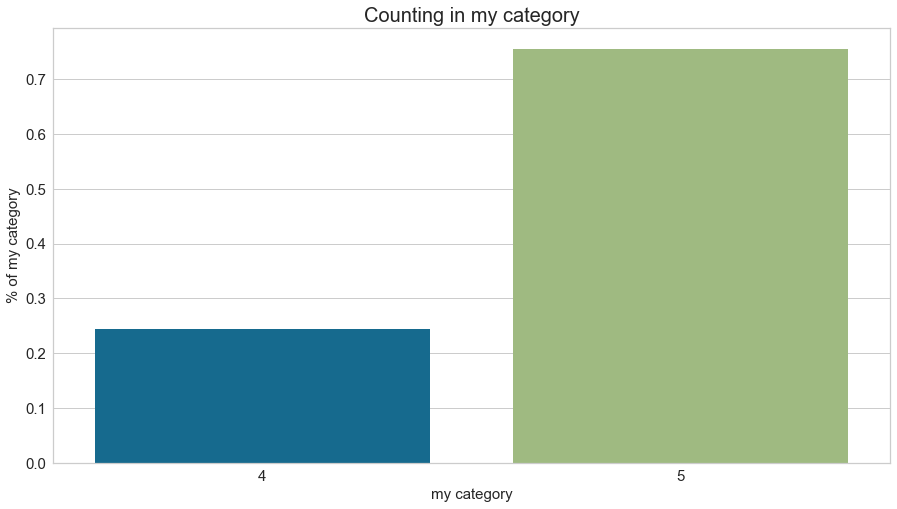

In [110]:
plot_count_col(df_clients_original[(df_clients_original.clusters==0)], col= 'review_score_MAX', label_col='my category', show_val=False, on_x=True)

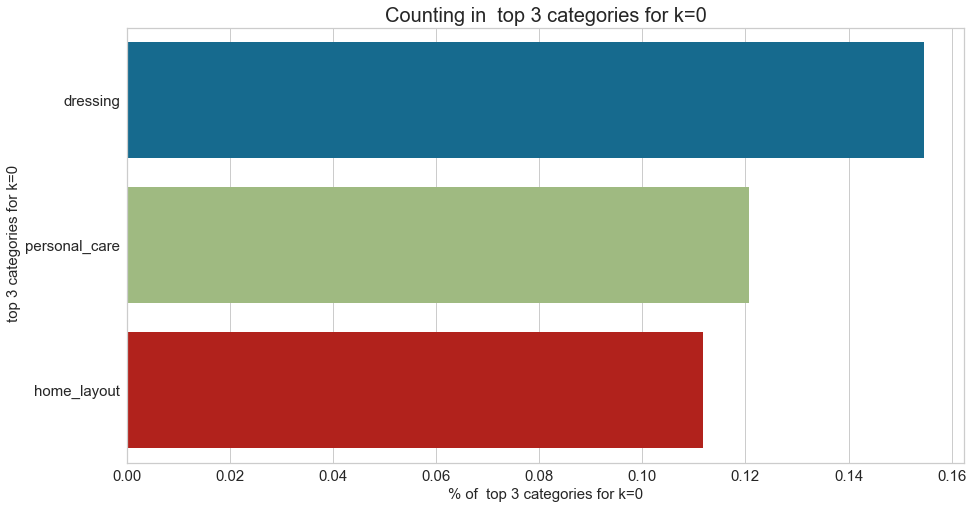

In [124]:
plot_count_col(df_clients_original[(df_clients_original.clusters==0)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(0), show_val=False, on_x=False, top=3)

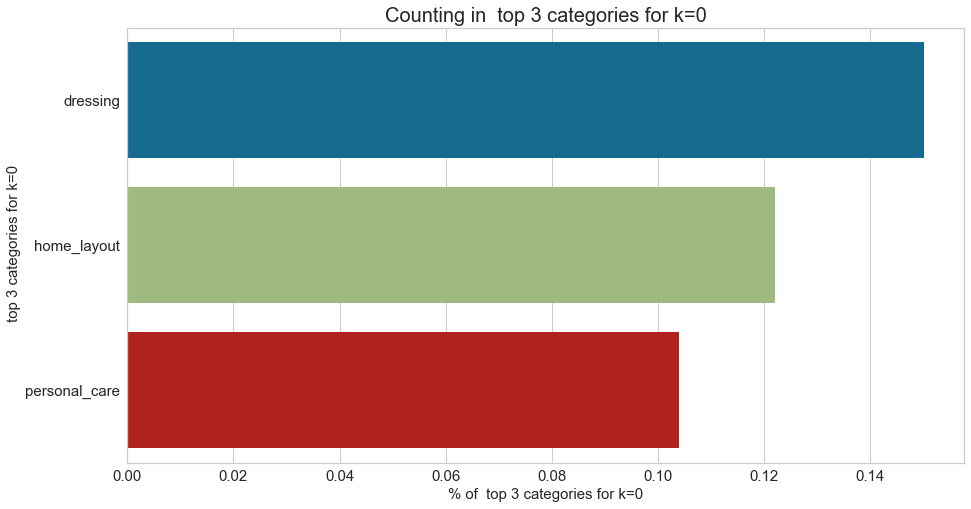

In [139]:
plot_count_col(df_clients_original[(df_clients_original.clusters==0) & (df_clients_original.review_score_MAX == 4)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(0), show_val=False, on_x=False, top=3)

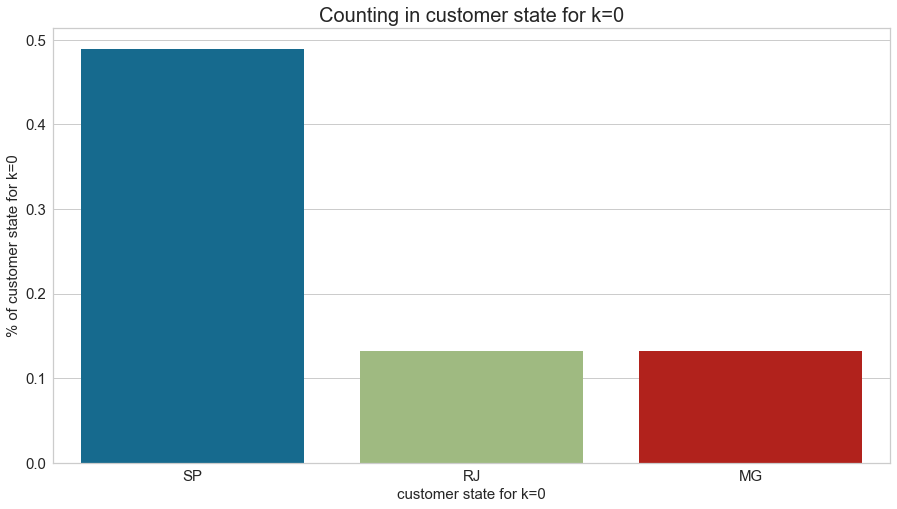

In [159]:
plot_count_col(df_clients_original[(df_clients_original.clusters==0)], col= 'customer_state_top10_LAMBDA', label_col='customer state for k=0', show_val=False, on_x=True, top=3)

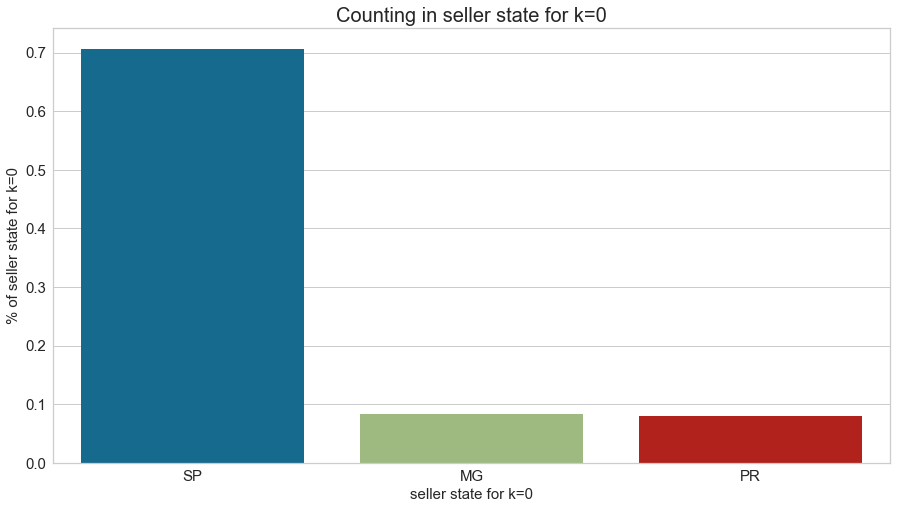

In [161]:
plot_count_col(df_clients_original[(df_clients_original.clusters==0)], col= 'seller_state_top10_LAMBDA', label_col='seller state for k=0', show_val=False, on_x=True, top=3)

## What clients are in cluster 1?

 - contains generaly the ***rich*** customers, that give reviews score from 1 to 5
 - top 3 categories that are prefered by these clients are computer, accessories, tools.
 - buyed product was the most expensive
 - taking the mean and the maximum values it was the longest delivered after the order was approved (`diff_car_app_MEAN`) and in the mean it was relatively fast delivered to the clients after it was delivered to the logistic partner (`diff_del_car_MEAN`) wheres in maximum value it is the clients that was delivered to the logistic partner faster then others.
 - top customer states are in SP slightly more then 30% of clients, Others near to 20% of clients and RJ slightly less than 10%.
 - top seller states are SP with about 50% and BA, RJ are approximatly then 10%.

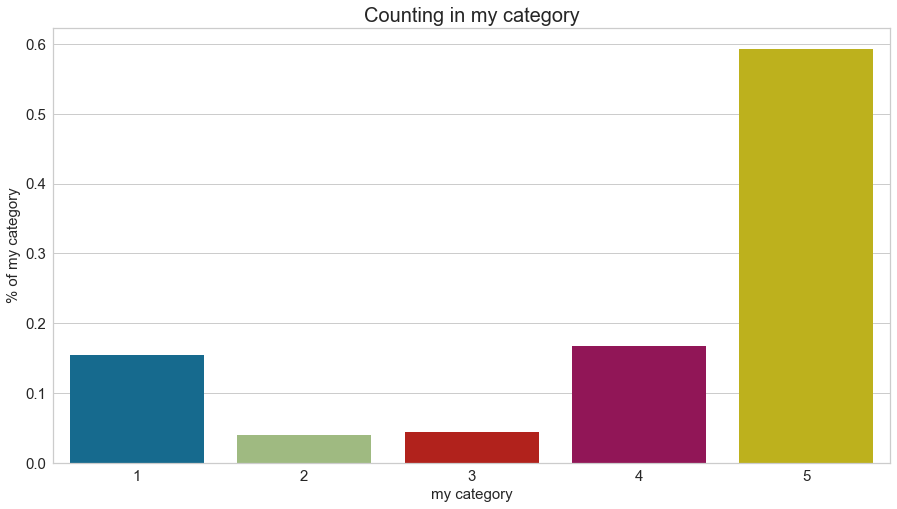

In [125]:
plot_count_col(df_clients_original[(df_clients_original.clusters==1)], col= 'review_score_MAX', label_col='my category', show_val=False, on_x=True)

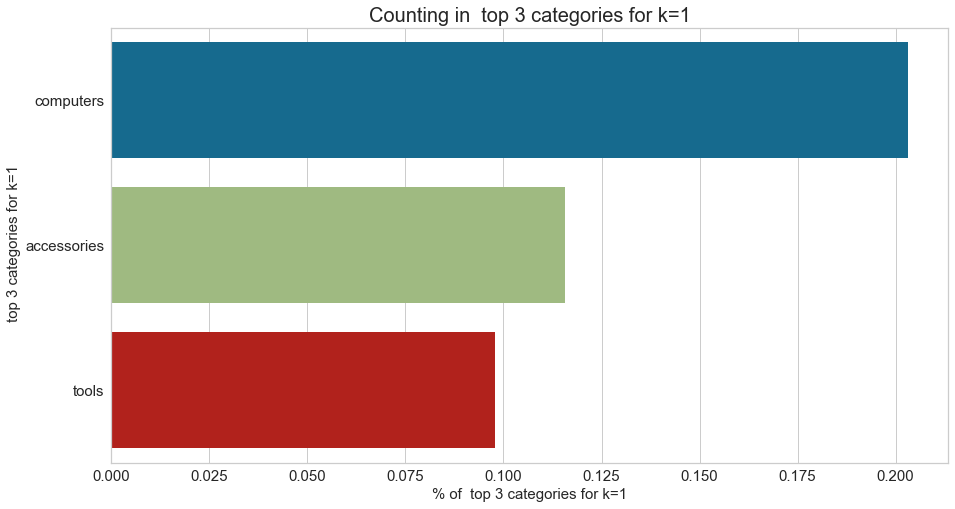

In [126]:
plot_count_col(df_clients_original[(df_clients_original.clusters==1)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(1), show_val=False, on_x=False, top=3)

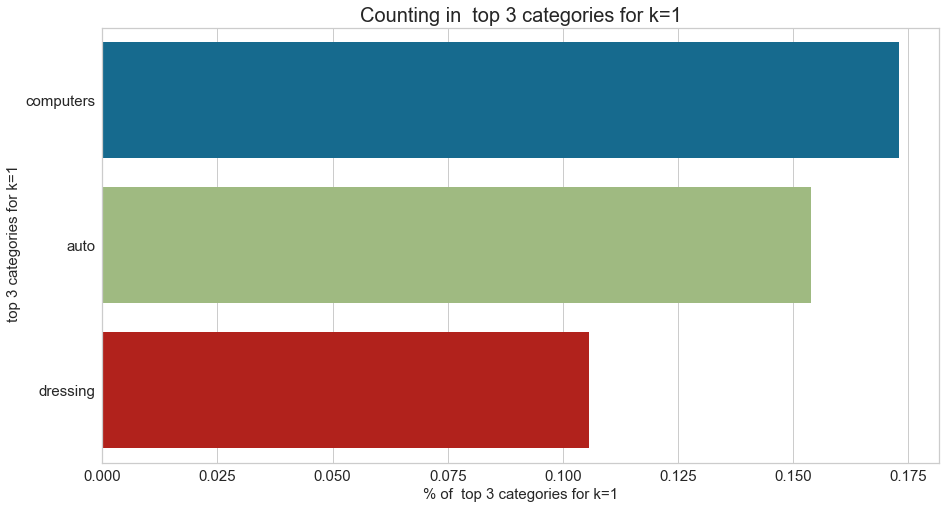

In [142]:
plot_count_col(df_clients_original[(df_clients_original.clusters==1) & (df_clients_original.review_score_MAX == 1)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(1), show_val=False, on_x=False, top=3)

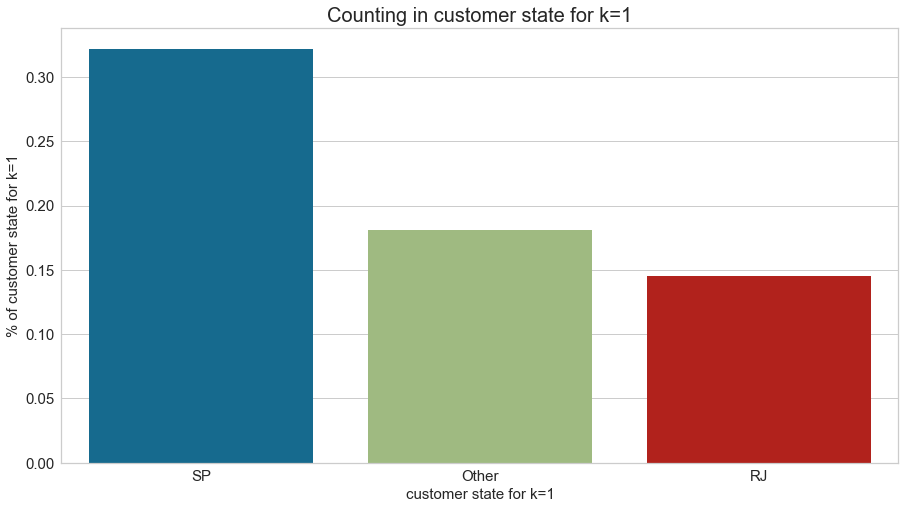

In [158]:
plot_count_col(df_clients_original[(df_clients_original.clusters==1)], col= 'customer_state_top10_LAMBDA', label_col='customer state for k=1', show_val=False, on_x=True, top=3)

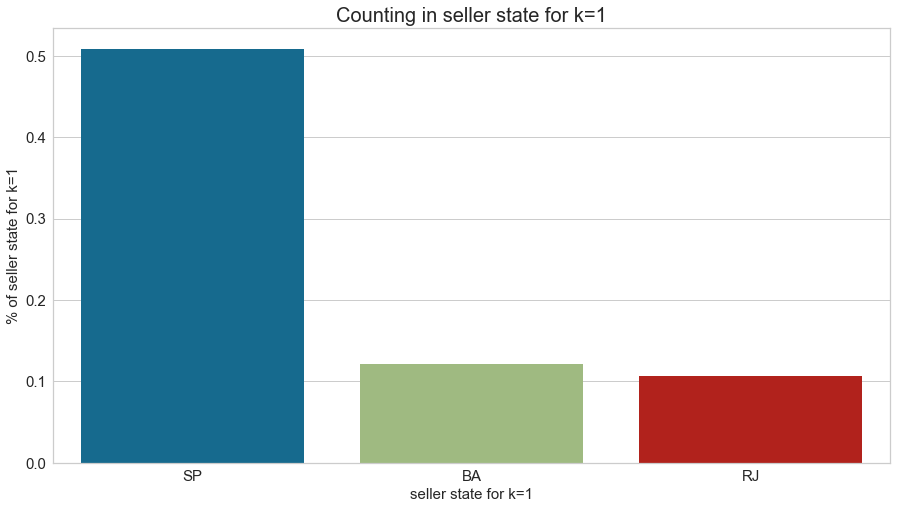

In [162]:
plot_count_col(df_clients_original[(df_clients_original.clusters==1)], col= 'seller_state_top10_LAMBDA', label_col='seller state for k=1', show_val=False, on_x=True, top=3)

## What clients are in cluster 2?

 - contains ***all types*** of customers that gives review score from 1 to 5. The most one being satisfied customers
 - top 3 categories that are prefered by theese clients are personal care, dressing, accessories
 - the customers are in medium by their richness
 - 70% of theese customers are from Other regions then the top 10 states
 - taking the mean and the maximum values it was the relatively fast delivered after the order was approved (`diff_car_app_MEAN`) and in the mean and max it was slowly delivered to the clients after it was delivered to the logistic partner (`diff_del_car_MEAN`)
 - 70% of seller states are SP

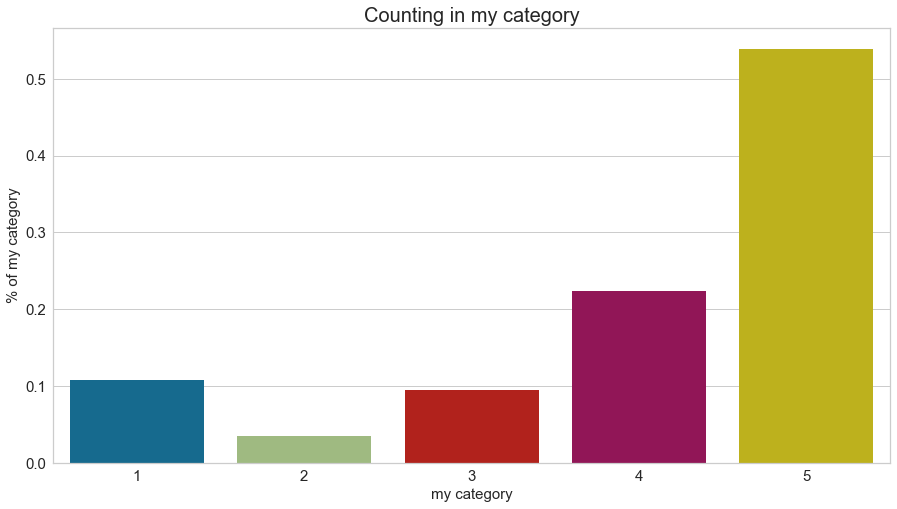

In [127]:
plot_count_col(df_clients_original[(df_clients_original.clusters==2)], col= 'review_score_MAX', label_col='my category', show_val=False, on_x=True)

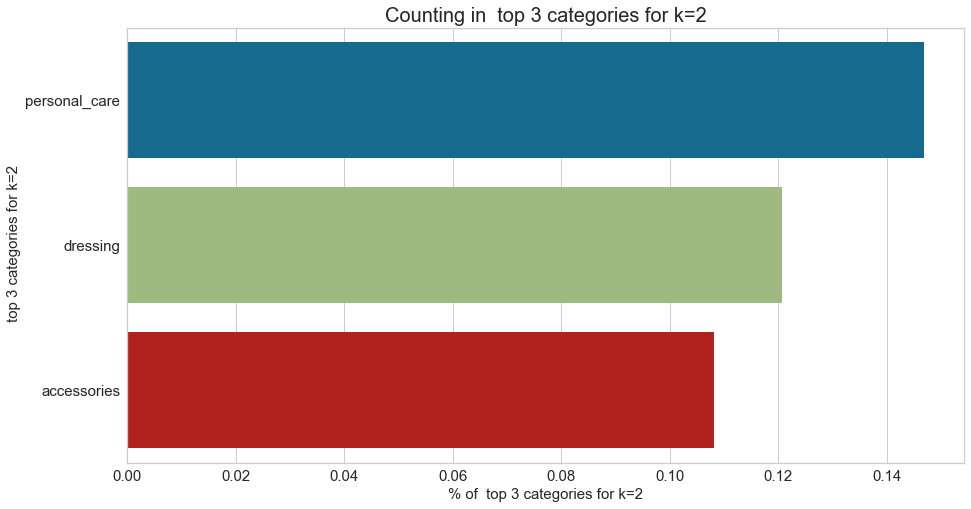

In [128]:
plot_count_col(df_clients_original[(df_clients_original.clusters==2)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(2), show_val=False, on_x=False, top=3)

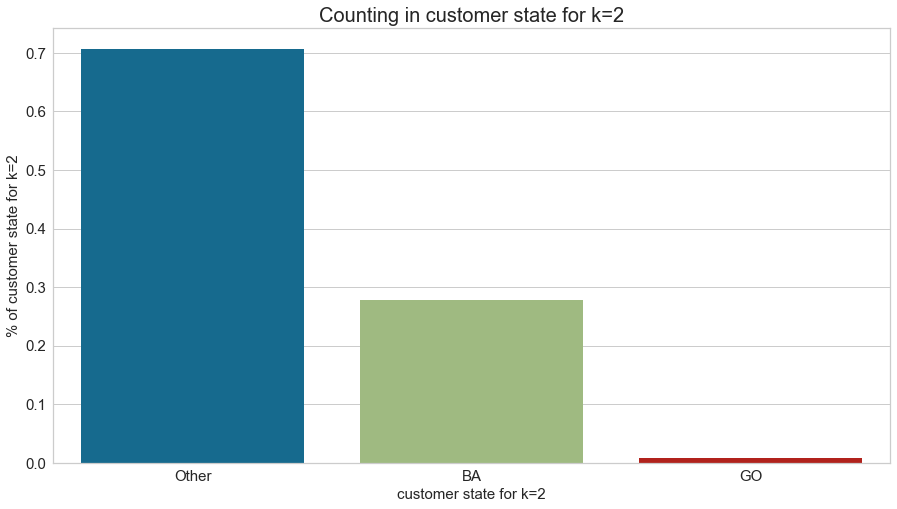

In [157]:
plot_count_col(df_clients_original[(df_clients_original.clusters==2)], col= 'customer_state_top10_LAMBDA', label_col='customer state for k=2', show_val=False, on_x=True, top=3)

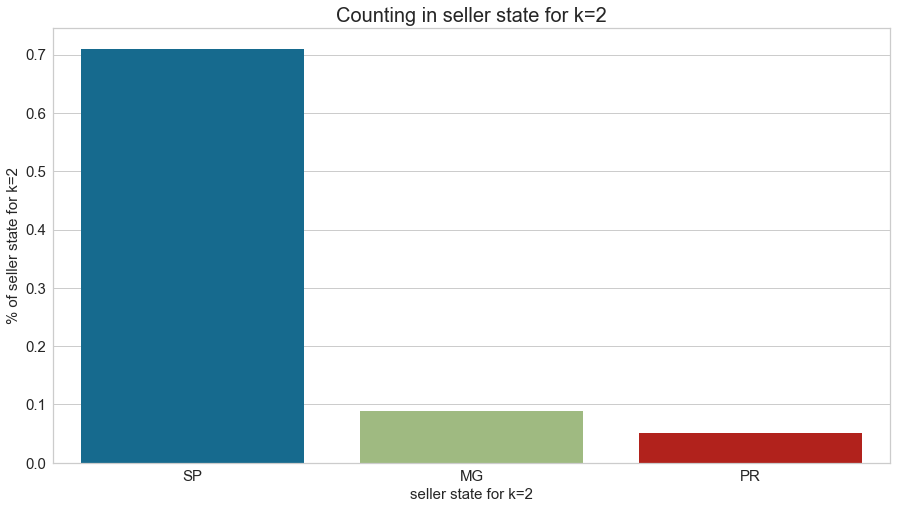

In [163]:
plot_count_col(df_clients_original[(df_clients_original.clusters==2)], col= 'seller_state_top10_LAMBDA', label_col='seller state for k=2', show_val=False, on_x=True, top=3)

## What clients are in cluster 3?

 - contains the most ***loyal*** clients with maximum number of  14 products buyed with satisfaction score from 1 to 5. However, the most clients have given a satisfied score.
 - top 3 categories are personal care, accesories and dressing,
 - the customer is relatively rich compared with other categories
 - Customer states for theese category is well distributed, having different customers from different states, where the most seen is the SP with around 35%
 - taking the mean and the maximum values it was the normally delivered after the order was approved (`diff_car_app_MEAN`) and in the mean and max it was norllly delivered to the clients after it was delivered to the logistic partner ``diff_del_car_MEAN`)

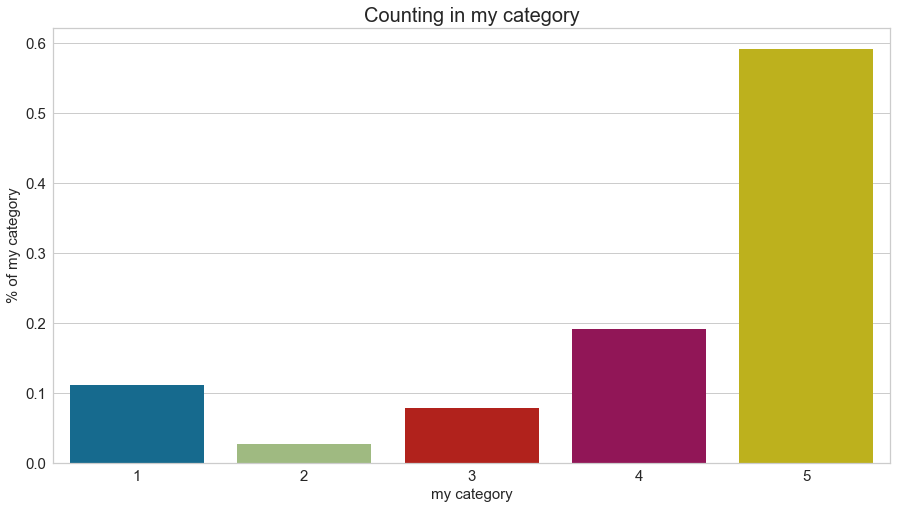

In [129]:
plot_count_col(df_clients_original[(df_clients_original.clusters==3)], col= 'review_score_MAX', label_col='my category', show_val=False, on_x=True)

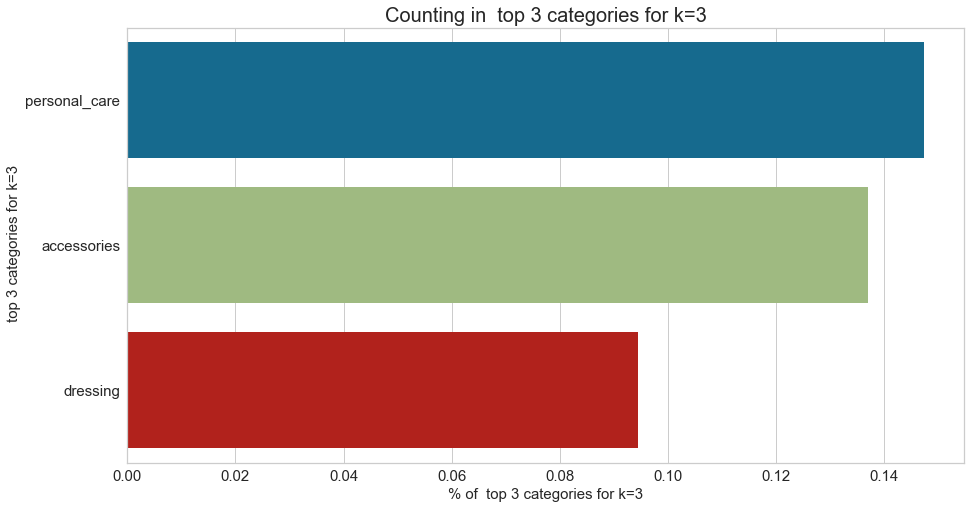

In [130]:
plot_count_col(df_clients_original[(df_clients_original.clusters==3)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(3), show_val=False, on_x=False, top=3)

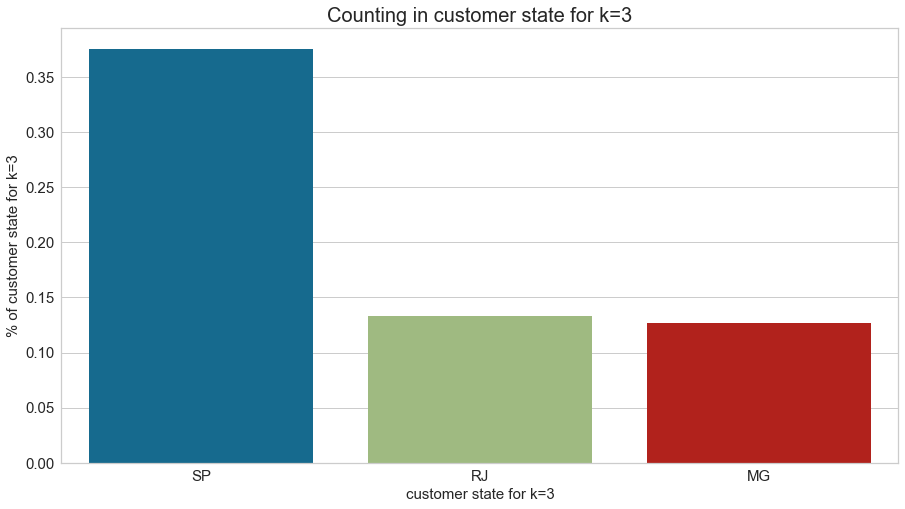

In [156]:
plot_count_col(df_clients_original[(df_clients_original.clusters==3)], col= 'customer_state_top10_LAMBDA', label_col='customer state for k=3', show_val=False, on_x=True, top=3)

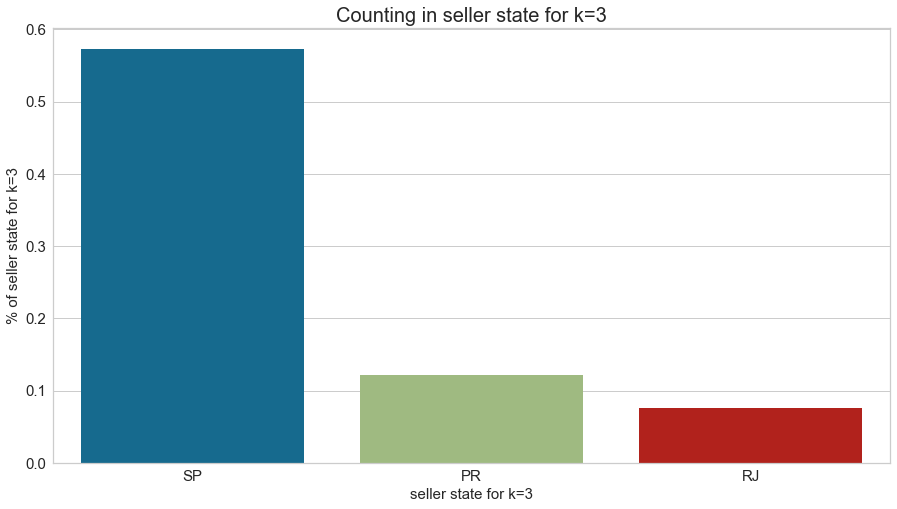

In [164]:
plot_count_col(df_clients_original[(df_clients_original.clusters==3)], col= 'seller_state_top10_LAMBDA', label_col='seller state for k=3', show_val=False, on_x=True, top=3)

## What clients are in cluster 4?

 - contans ***not satisfied*** clients that gave satisfaction score from 1 to 3. Mostly of them gived the score 1.
 - top 3 categories of the 4th cluster being home layout, dressing and personal care.
 - regarding to the maximum payed price these customers are the poorest customers
 - More then 40% of customers is SP
 - taking the mean and the maximum values it was the relatively slowly delivered after the order was approved `diff_car_app_MEAN`) and in the max it was slowlest delivered to the clients after it was delivered to the logistic partner (`diff_del_car_MEAN`)

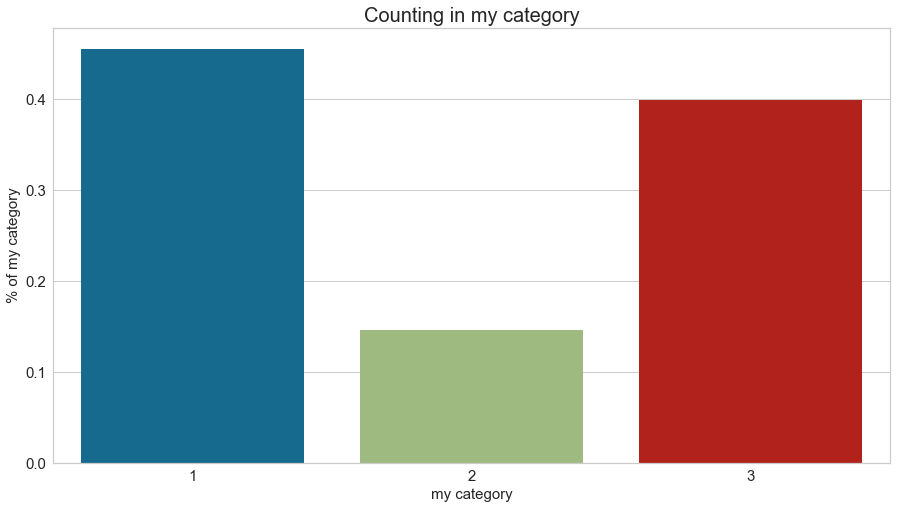

In [131]:
plot_count_col(df_clients_original[(df_clients_original.clusters==4)], col= 'review_score_MAX', label_col='my category', show_val=False, on_x=True)

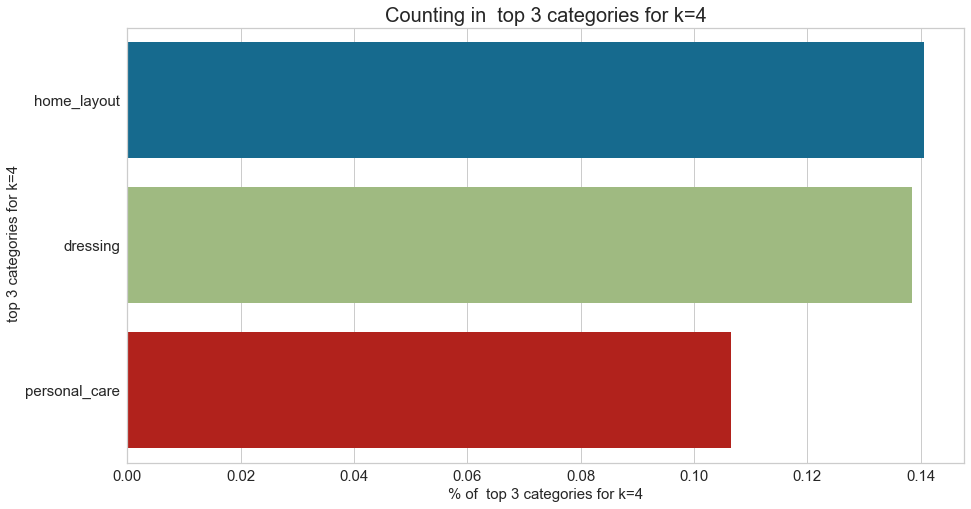

In [132]:
plot_count_col(df_clients_original[(df_clients_original.clusters==4)], col= 'my_categoty_LAMBDA', label_col=' top 3 categories for k={0}'.format(4), show_val=False, on_x=False, top=3)

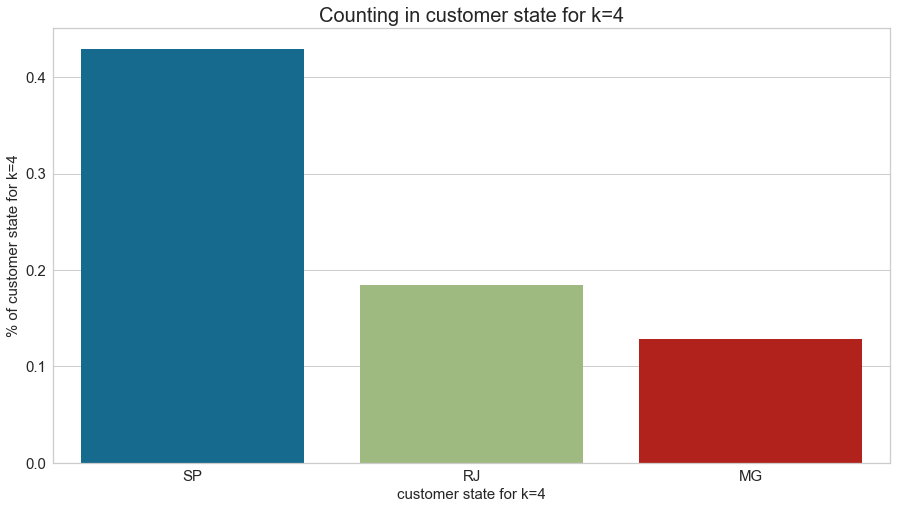

In [160]:
plot_count_col(df_clients_original[(df_clients_original.clusters==4)], col= 'customer_state_top10_LAMBDA', label_col='customer state for k=4', show_val=False, on_x=True, top=3)

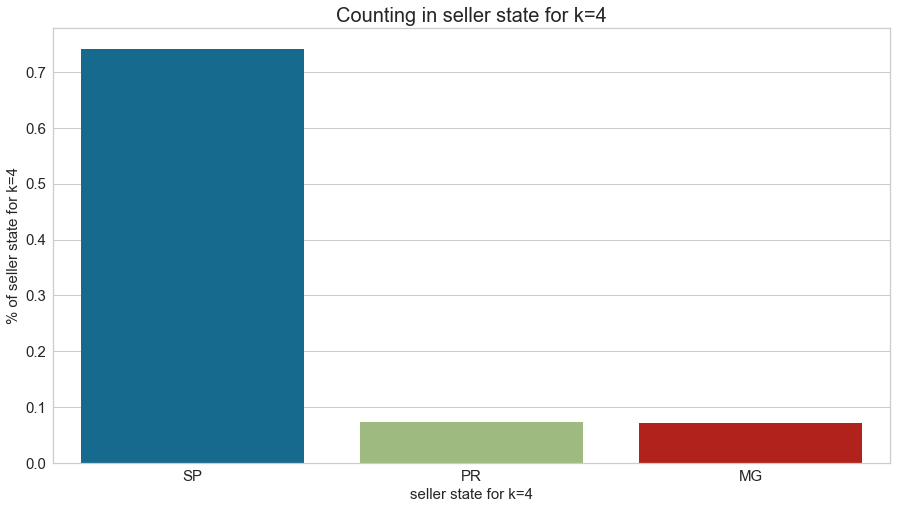

In [167]:
plot_count_col(df_clients_original[(df_clients_original.clusters==4)], col= 'seller_state_top10_LAMBDA', label_col='seller state for k=4', show_val=False, on_x=True, top=3)